**Business Problem**

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

**Let’s explore the dataset.**

In [ ]:
netflix_dataset = pd.read_csv("netflix.csv")
print("Dataset Shape:", netflix_dataset.shape)

Dataset Shape: (8807, 12)


 **There are 8807 rows and 12 columns in the dataset.**

In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**As the dataframe has 8807 rows there are some columns in here that have a lot of null/missing values like director, cast, country etc. Except release_year all the other columns are of object type.**

In [ ]:
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


This output confirms all the previously known facts about this dataset. It contains 8807 entries and 12 columns. We can also see that there are NaN values
in some columns.

In [ ]:
for i in netflix_dataset.columns:
    null_rate = netflix_dataset[i].isna().sum() / len(netflix_dataset) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


**The percentage of null/missing values in columns. Column director has a high percentage of such values, while significant numbers which can affect our analysis are present in the cast and country columns. We have to create a strategy to deal with these values.**

In [ ]:
for i in netflix_dataset.columns:
  print(i, ":", netflix_dataset[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


We can see that columns like show_id, title are completely unique and hence they can be used for future operations like merge, if needed.

In [ ]:
#director column has multiple comma seperated values which have to be split to single-value per row
dir_list = netflix_dataset['director'].apply(lambda obj : str(obj).split(",")).to_list()

In [ ]:
# pivot the director column
dir_ds1 = pd.DataFrame(dir_list, index=netflix_dataset['title'])
dir_ds2 = dir_ds1.stack()
dir_ds2 = pd.DataFrame(dir_ds2.reset_index())
dir_ds2.head(20)

,title,level_1,0
0,Dick Johnson Is Dead,0,Kirsten Johnson
1,Blood & Water,0,nan
2,Ganglands,0,Julien Leclercq
3,Jailbirds New Orleans,0,nan
4,Kota Factory,0,nan
5,Midnight Mass,0,Mike Flanagan
6,My Little Pony: A New Generation,0,Robert Cullen
7,My Little Pony: A New Generation,1,José Luis Ucha
8,Sankofa,0,Haile Gerima
9,The Great British Baking Show,0,Andy Devonshire


This operation has helped us in converting long-form data into wide-form data. The multiple directors values within a single row, from earlier, are now within multiple rows such that each row of title(which repeats) has only one director. This will help us analyse the director column better.

In [ ]:
# Drop unrequired columns and create DF
dir_ds1 = pd.DataFrame(dir_list, index=netflix_dataset['title'])
dir_ds2 = dir_ds1.stack()
dir_ds2 = pd.DataFrame(dir_ds2.reset_index())
dir_ds2.rename(columns={0:'Directors'}, inplace=True)
dir_ds2.drop(['level_1'], axis=1, inplace=True)
dir_ds2.head(10)

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


In [ ]:
for i in dir_ds2.columns:
  print(i, ":", dir_ds2[i].nunique())

title : 8807
Directors : 5121


Let's do the above mentioned process of splitting the multiple values from cast, genre and country columns into single-value for each row.

In [ ]:
cast_list = netflix_dataset['cast'].apply(lambda obj : str(obj).split(",")).to_list()

In [ ]:
cast_ds1 = pd.DataFrame(cast_list, index=netflix_dataset['title'])
cast_ds2 = cast_ds1.stack()
cast_ds2 = pd.DataFrame(cast_ds2.reset_index())
cast_ds2.head(20)

,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
5,Blood & Water,4,Dillon Windvogel
6,Blood & Water,5,Natasha Thahane
7,Blood & Water,6,Arno Greeff
8,Blood & Water,7,Xolile Tshabalala
9,Blood & Water,8,Getmore Sithole


In [ ]:
cast_ds1 = pd.DataFrame(cast_list, index=netflix_dataset['title'])
cast_ds2 = cast_ds1.stack()
cast_ds2 = pd.DataFrame(cast_ds2.reset_index())
cast_ds2.rename(columns={0:'Actors'}, inplace=True)
cast_ds2.drop(['level_1'], axis=1, inplace=True)
cast_ds2.head(10)

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
5,Blood & Water,Dillon Windvogel
6,Blood & Water,Natasha Thahane
7,Blood & Water,Arno Greeff
8,Blood & Water,Xolile Tshabalala
9,Blood & Water,Getmore Sithole


In [ ]:
for i in cast_ds2.columns:
  print(i, ":", cast_ds2[i].nunique())

title : 8807
Actors : 39297


In [ ]:
genre_list = netflix_dataset['listed_in'].apply(lambda obj : str(obj).split(', ')).tolist()
genre_ds1=pd.DataFrame(genre_list,index=netflix_dataset['title'])
genre_ds2=genre_ds1.stack()
genre_ds2=pd.DataFrame(genre_ds2.reset_index())
genre_ds2.rename(columns={0:'Genre'},inplace=True)
genre_ds2.drop(['level_1'],axis=1,inplace=True)
genre_ds2.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [ ]:
country_list = netflix_dataset['country'].apply(lambda obj : str(obj).split(', ')).tolist()
country_ds1=pd.DataFrame(country_list,index=netflix_dataset['title'])
country_ds2=country_ds1.stack()
country_ds2=pd.DataFrame(country_ds2.reset_index())
country_ds2.rename(columns={0:'Country'},inplace=True)
country_ds2.drop(['level_1'],axis=1,inplace=True)
country_ds2.head()

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [ ]:
for i in country_ds2.columns:
  print(i, ":", country_ds2[i].nunique())

title : 8807
Country : 128


In [ ]:
# Merge all 4 DataFrames(director, cast, country, genre) together by inner join
merged_df = pd.merge(dir_ds2, cast_ds2, on='title', how='inner')
merged_df1 = pd.merge(merged_df, genre_ds2, on='title', how='inner')
final_merged_df = pd.merge(merged_df1, country_ds2, on='title', how='inner')
final_merged_df

,title,Directors,Actors,Genre,Country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa
...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India
201987,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India


In [ ]:
# Fill missing values in the final_merged_df dataframe
final_merged_df.replace("nan", np.nan,inplace=True)
final_merged_df['Directors'] = final_merged_df['Directors'].fillna('Unknown director')
final_merged_df['Actors'] = final_merged_df['Actors'].fillna('Unknown actor')
final_merged_df['Genre'] = final_merged_df['Genre'].fillna('Unknown genre')
final_merged_df

,title,Directors,Actors,Genre,Country
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown actor,Documentaries,United States
1,Blood & Water,Unknown director,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,Unknown director,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,Unknown director,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,Unknown director,Khosi Ngema,International TV Shows,South Africa
...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India
201987,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India


In [ ]:
# Merging our unnested data with the original Netflix dataset
df_final=final_merged_df.merge(netflix_dataset[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration', 'description']],on=['title'],how='left')
df_final

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unknown director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unknown director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unknown director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unknown director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201987,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


In [ ]:
# Print number of missing values for each column in DF

df_final.isnull().sum()

title               0
Directors           0
Actors              0
Genre               0
Country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
description         0
dtype: int64

In [ ]:
# Null rate in columns with such values
for i in df_final.columns:
    null_rate = df_final[i].isna().sum() / len(df_final) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

Country null rate: 5.89%
date_added null rate: 0.08%
rating null rate: 0.03%
duration null rate: 0.0%


In [ ]:
df_final[df_final['date_added'].isnull()].head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,description
136893,A Young Doctor's Notebook and Other Stories,Unknown director,Daniel Radcliffe,British TV Shows,United Kingdom,6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
136894,A Young Doctor's Notebook and Other Stories,Unknown director,Daniel Radcliffe,TV Comedies,United Kingdom,6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
136895,A Young Doctor's Notebook and Other Stories,Unknown director,Daniel Radcliffe,TV Dramas,United Kingdom,6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
136896,A Young Doctor's Notebook and Other Stories,Unknown director,Jon Hamm,British TV Shows,United Kingdom,6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
136897,A Young Doctor's Notebook and Other Stories,Unknown director,Jon Hamm,TV Comedies,United Kingdom,6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."


In [ ]:
# Fill missing values in the "date_added" column with mode of the "date_added" column for each release year.

for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():

  imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
  df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)

df_final[df_final['date_added'].isnull()].head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,description


In [ ]:
# Fill in missing values in the "Country" column based on the mode of "Country" column for each director.

for i in df_final[df_final['Country'].isnull()]['Directors'].unique():

  if i in df_final[~df_final['Country'].isnull()]['Directors'].unique():

    imp=df_final[df_final['Directors']==i]['Country'].mode().values[0]
    df_final.loc[df_final['Directors']==i,'Country']=df_final.loc[df_final['Directors']==i,'Country'].fillna(imp)


In [ ]:
# Fill nulls in Country with mode of Country for each Actor.

for i in df_final[df_final['Country'].isnull()]['Actors'].unique():

  if i in df_final[~df_final['Country'].isnull()]['Actors'].unique():
    imp=df_final[df_final['Actors']==i]['Country'].mode().values[0]
    df_final.loc[df_final['Actors']==i,'Country']=df_final.loc[df_final['Actors']==i,'Country'].fillna(imp)

#If there are still nulls

df_final['Country'].fillna('Unknown Country',inplace=True)
df_final.isnull().sum()


title            0
Directors        0
Actors           0
Genre            0
Country          0
show_id          0
type             0
date_added       0
release_year     0
rating          67
duration         3
description      0
dtype: int64

In [ ]:
df_final['Country'] = df_final['Country'].str.replace(',', '')

In [ ]:
df_final['duration'].value_counts()

1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: duration, Length: 220, dtype: int64

In [ ]:
#removing mins from duration column data

df_final['duration']=df_final['duration'].str.replace(" min","")
df_final.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown actor,Documentaries,United States,1,Movie,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unknown director,Ama Qamata,International TV Shows,South Africa,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unknown director,Ama Qamata,TV Dramas,South Africa,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unknown director,Ama Qamata,TV Mysteries,South Africa,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unknown director,Khosi Ngema,International TV Shows,South Africa,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [ ]:
# If Season string is contained in column then make it 0 else copy the original value.

df_final['duration_movies'] = np.where(df_final['duration'].str.contains('Season'), 0, df_final['duration'])
df_final['duration_movies']=df_final['duration_movies'].astype('int')
df_final.head(20)

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,description,duration_movies
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown actor,Documentaries,United States,1,Movie,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm...",90
1,Blood & Water,Unknown director,Ama Qamata,International TV Shows,South Africa,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
2,Blood & Water,Unknown director,Ama Qamata,TV Dramas,South Africa,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
3,Blood & Water,Unknown director,Ama Qamata,TV Mysteries,South Africa,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
4,Blood & Water,Unknown director,Khosi Ngema,International TV Shows,South Africa,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
5,Blood & Water,Unknown director,Khosi Ngema,TV Dramas,South Africa,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
6,Blood & Water,Unknown director,Khosi Ngema,TV Mysteries,South Africa,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
7,Blood & Water,Unknown director,Gail Mabalane,International TV Shows,South Africa,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
8,Blood & Water,Unknown director,Gail Mabalane,TV Dramas,South Africa,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
9,Blood & Water,Unknown director,Gail Mabalane,TV Mysteries,South Africa,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0


In [ ]:
# Split date_added columns for easier use.

df_final['date_added']=pd.to_datetime(df_final['date_added'])
df_final['month_added']=df_final['date_added'].dt.month
df_final['week_Added']=df_final['date_added'].dt.week
df_final['year']=df_final['date_added'].dt.year
df_final.head()

<ipython-input-144-6990d92d9f12>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_final['week_Added']=df_final['date_added'].dt.week


,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,description,duration_movies,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown actor,Documentaries,United States,1,Movie,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",90,9,38,2021
1,Blood & Water,Unknown director,Ama Qamata,International TV Shows,South Africa,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,38,2021
2,Blood & Water,Unknown director,Ama Qamata,TV Dramas,South Africa,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,38,2021
3,Blood & Water,Unknown director,Ama Qamata,TV Mysteries,South Africa,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,38,2021
4,Blood & Water,Unknown director,Khosi Ngema,International TV Shows,South Africa,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,38,2021


**1) Find the counts of each categorical variable both using graphical and non-graphical analysis.**

In [ ]:
title_stats = df_final['title'].describe()
print(title_stats)

count                          201991
unique                           8807
top       Kahlil Gibran's The Prophet
freq                              700
Name: title, dtype: object


In [ ]:
dup_prop = df_final.duplicated(subset=['title']).sum()/ len(df_final)
print(f"Percentage of duplicates in title : {dup_prop * 100:.2f}%")

Percentage of duplicates in title : 95.64%


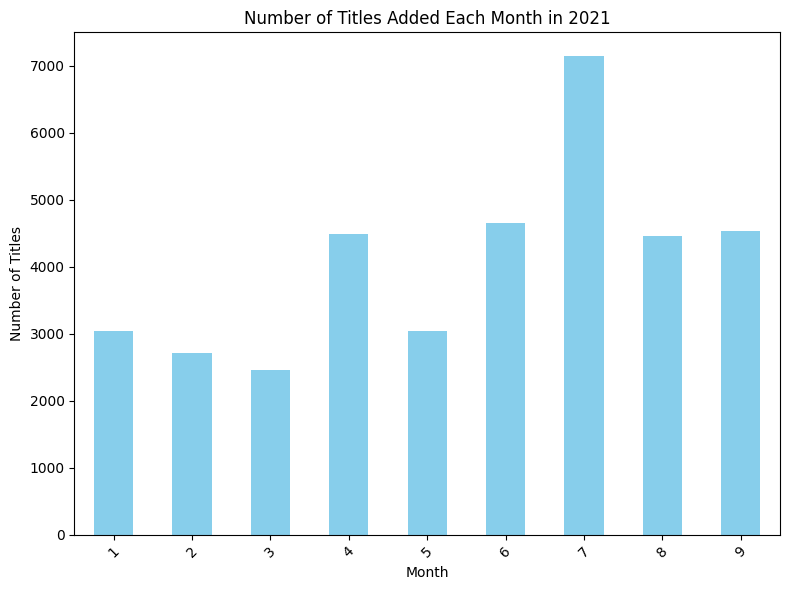

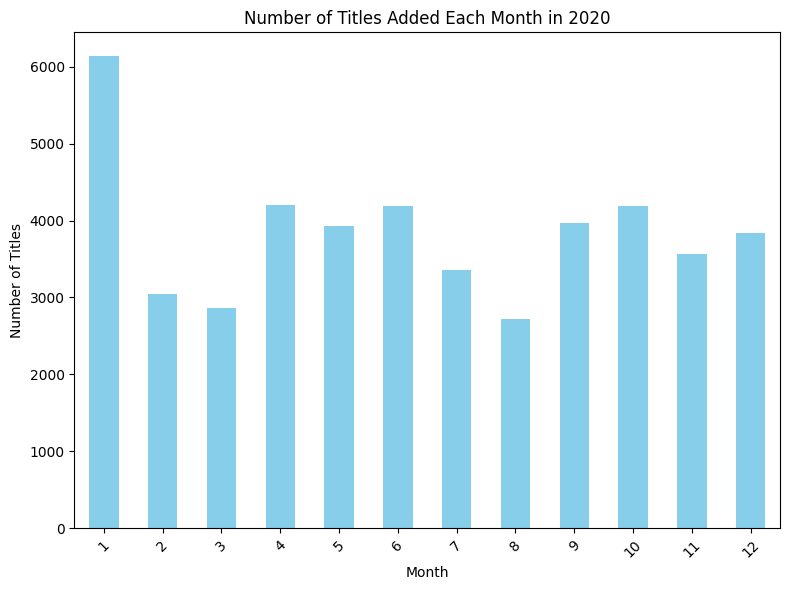

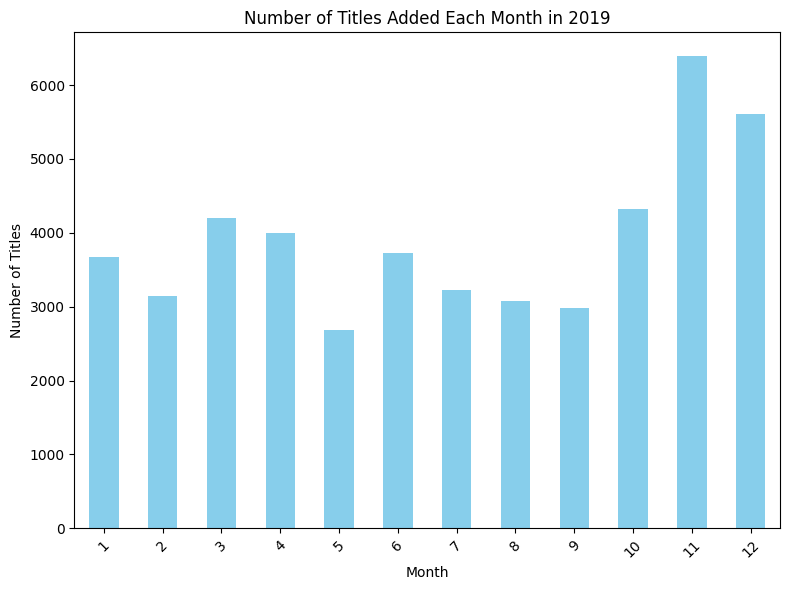

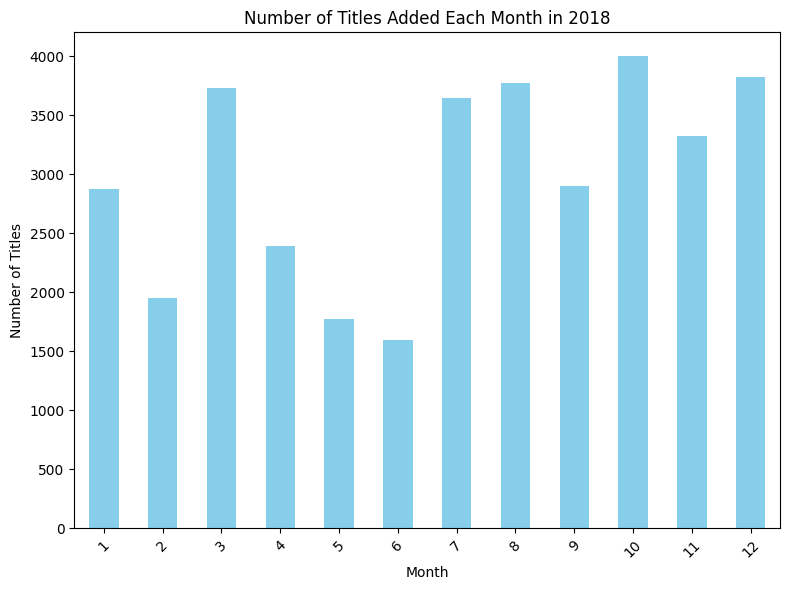

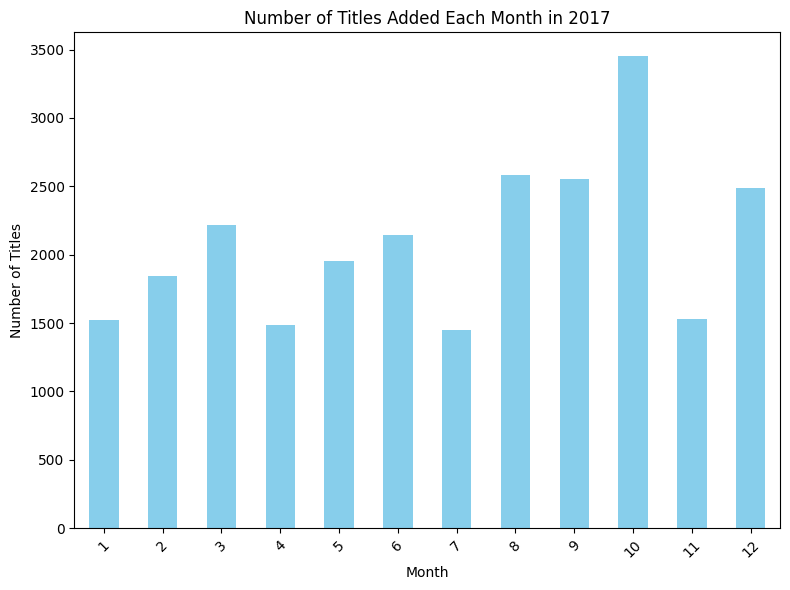

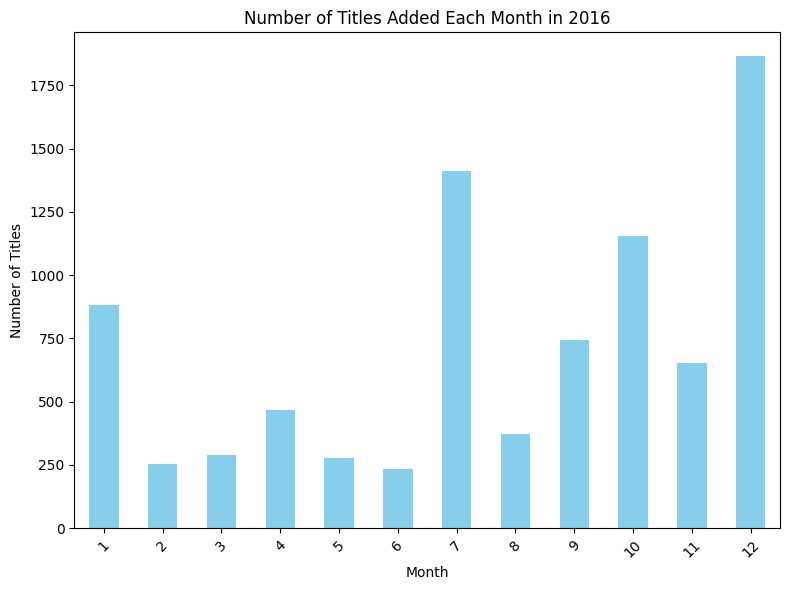

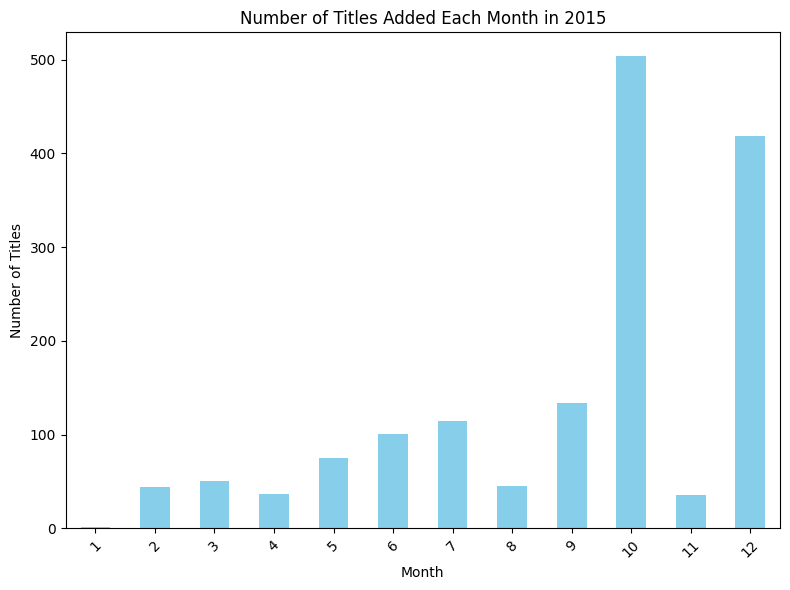

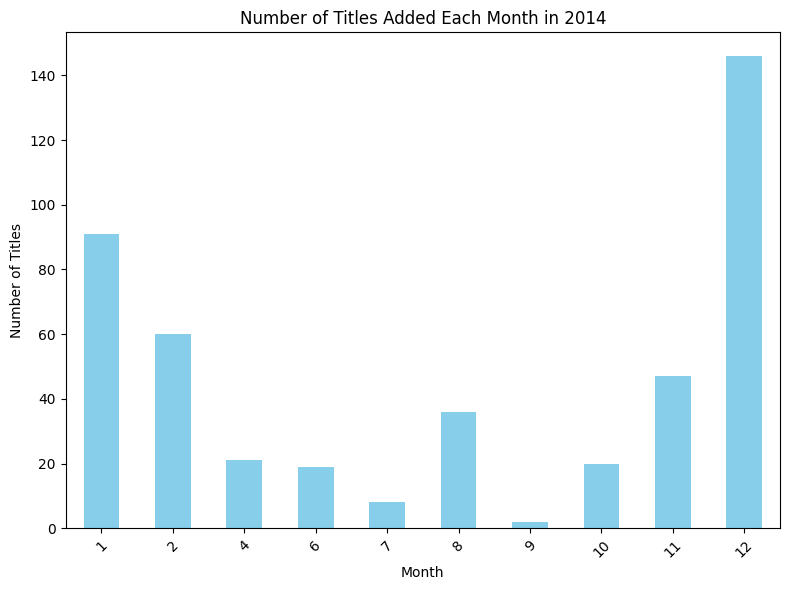

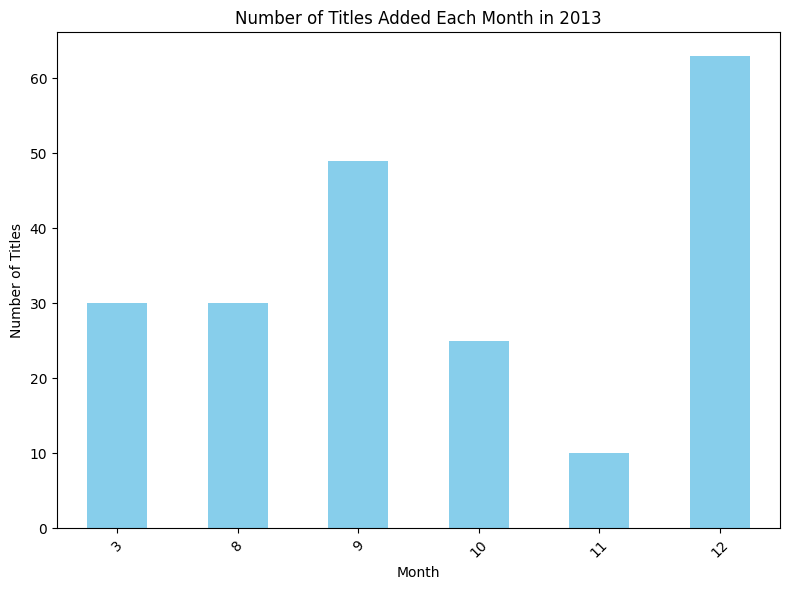

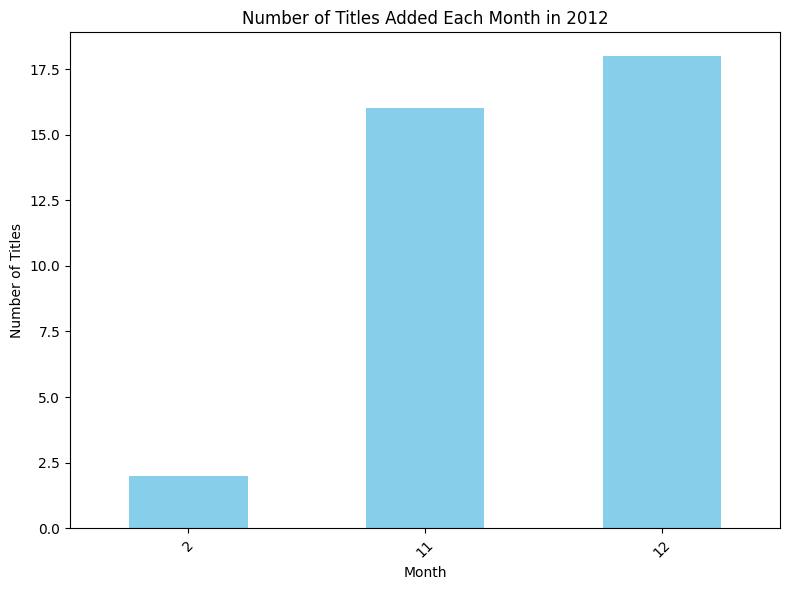

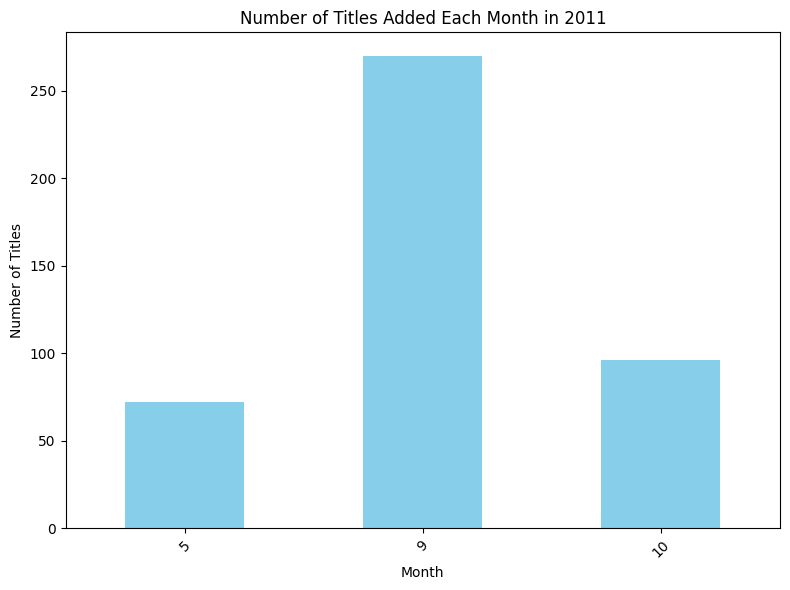

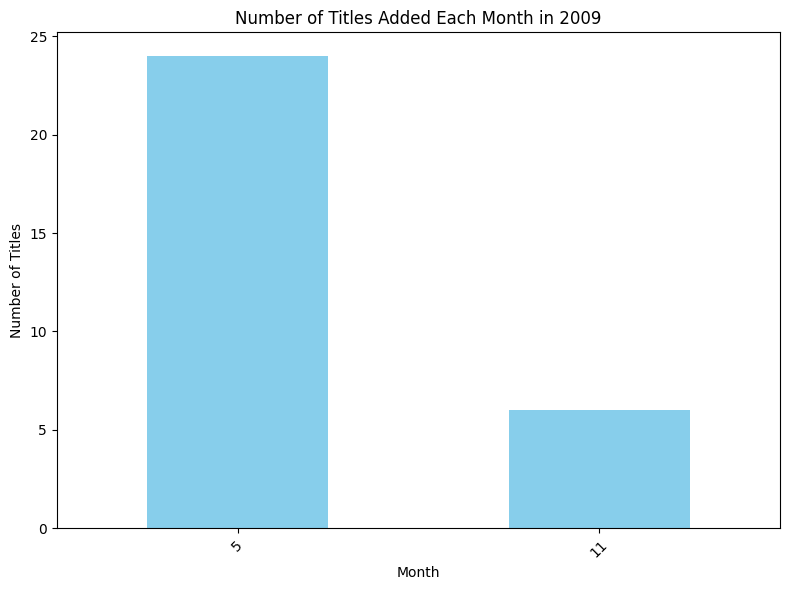

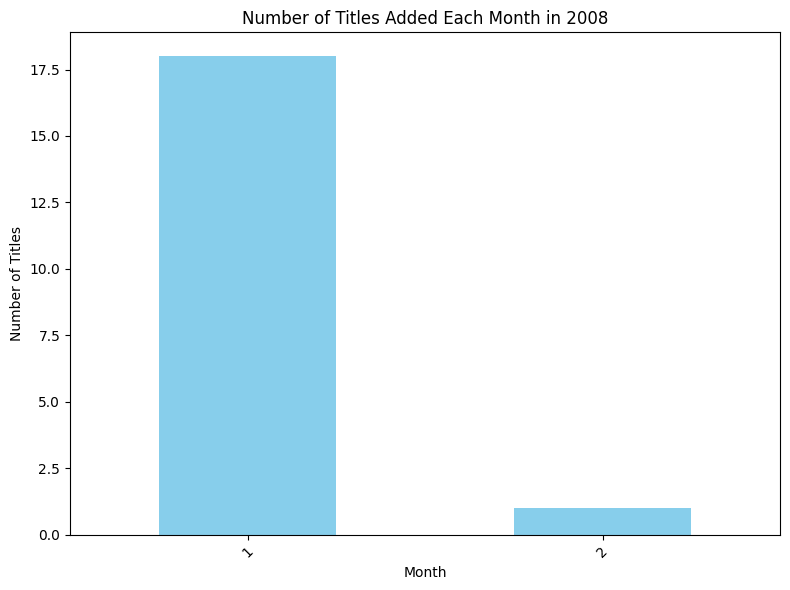

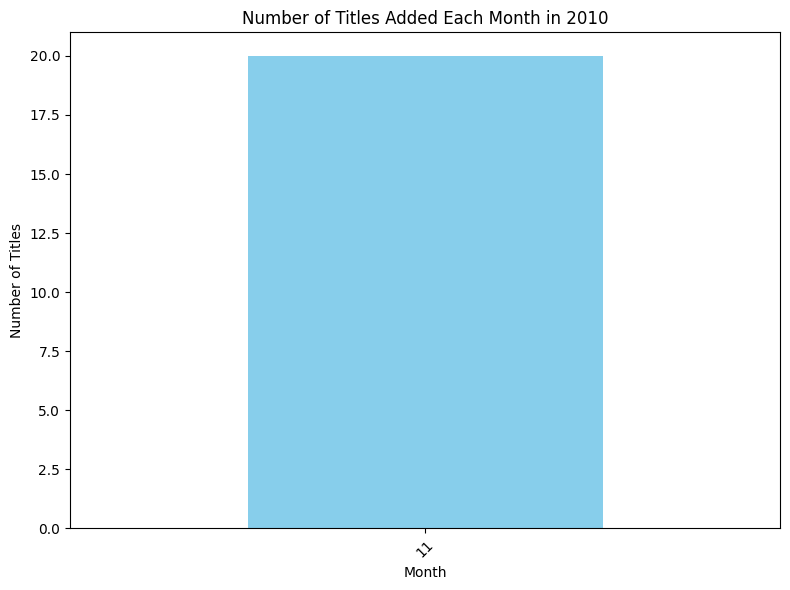

In [ ]:
# Unique years from the dataset
unique_years = df_final['year'].unique()

# Iterate over each year to create a histogram fo each year
for yr in unique_years:
    # Filter the data for the current year
    year_data = df_final[df_final['year'] == yr]

    # Group the filtered data by month and count the number of titles for each month
    title_counts = year_data.groupby(year_data['month_added']).size()

    # Plot the histogram for the current year
    plt.figure(figsize=(8, 6))
    title_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Month')
    plt.ylabel('Number of Titles')
    plt.title(f'Number of Titles Added Each Month in {yr}')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to prevent overlapping labels
    plt.show()


*   Netflix started adding a lot of titles since 2016.
*   Mostly the strategy has been to add more titles in the second half of the year. Except for in Covid maybe due to the hit to the market economy and production constraints.



In [ ]:
df_final.groupby(['Directors']).agg({"title":"nunique"}).sort_values(by='title', ascending=False)

,title
Directors,
Unknown director,2634
Rajiv Chilaka,22
Jan Suter,18
Raúl Campos,18
Marcus Raboy,16
...,...
J. Lee Thompson,1
J. Michael Long,1
Songyos Sugmakanan,1


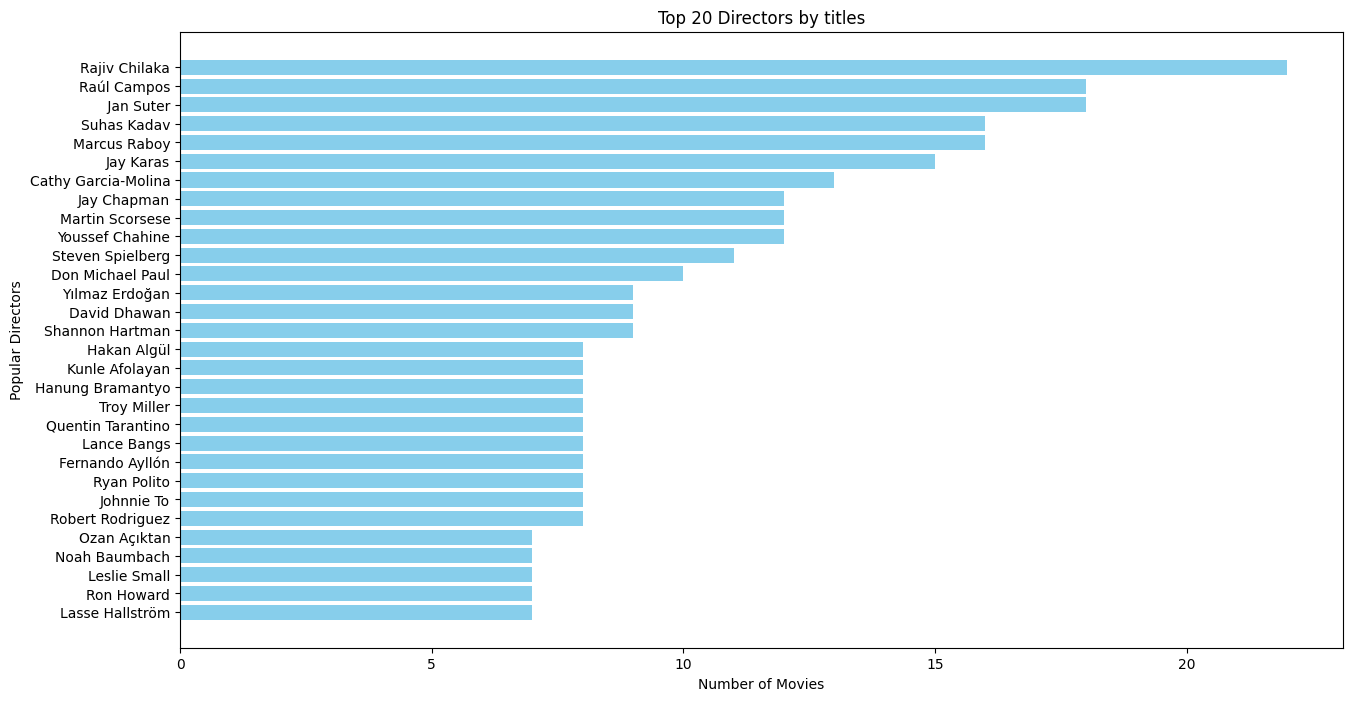

In [ ]:
# Group the DataFrame by 'Directors' and count the number of unique titles for each director
df_directors = df_final.groupby('Directors')['title'].nunique().reset_index()
# Sort the DataFrame in descending order based on the title count and exclude 'Unknown Director'
df_directors = df_directors[df_directors['Directors'] != 'Unknown director'].sort_values(by='title', ascending=False)[:30]

# Plot the horizontal bar chart
plt.figure(figsize=(15,8))
plt.title("Top 20 Directors by titles")
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['skyblue'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

In [ ]:
df_final.groupby(['Actors']).agg({"title":"nunique"}).sort_values(by='title', ascending=False).head(30)

,title
Actors,
Unknown actor,825
Anupam Kher,39
Rupa Bhimani,31
Takahiro Sakurai,30
Julie Tejwani,28
Om Puri,27
Rajesh Kava,26
Shah Rukh Khan,26
Boman Irani,25


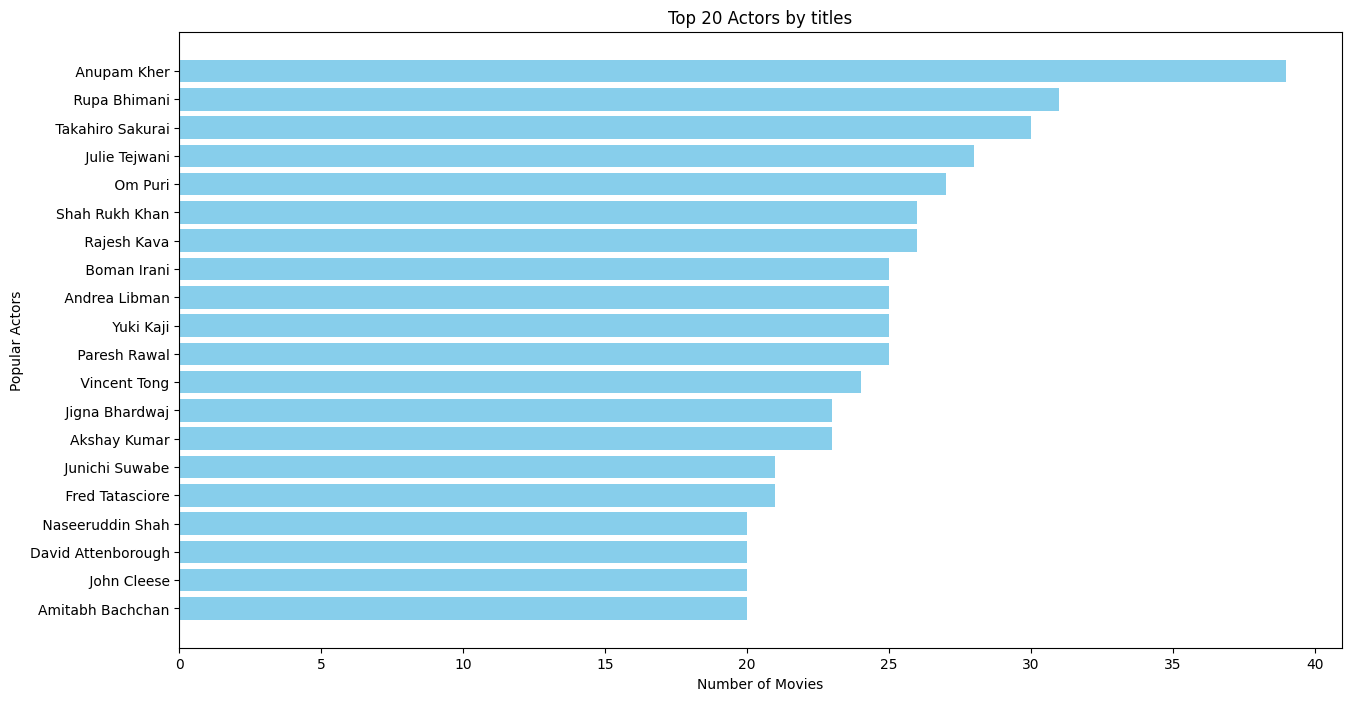

In [ ]:
# Group the DataFrame by 'Actors' and count the number of unique titles for each actor
df_actors = df_final.groupby('Actors')['title'].nunique().reset_index()
# Sort the DataFrame in descending order based on the title count and exclude 'Unknown Director'
df_actors = df_actors[df_actors['Actors'] != 'Unknown actor'].sort_values(by='title', ascending=False)[:20]

# Plot the horizontal bar chart
plt.figure(figsize=(15,8))
plt.title("Top 20 Actors by titles")
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['skyblue'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

In [ ]:
#number of distinct titles on the basis of genre
df_final.groupby(['Genre']).agg({"title":"nunique"}).sort_values(by='title', ascending=False).head(20)

,title
Genre,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


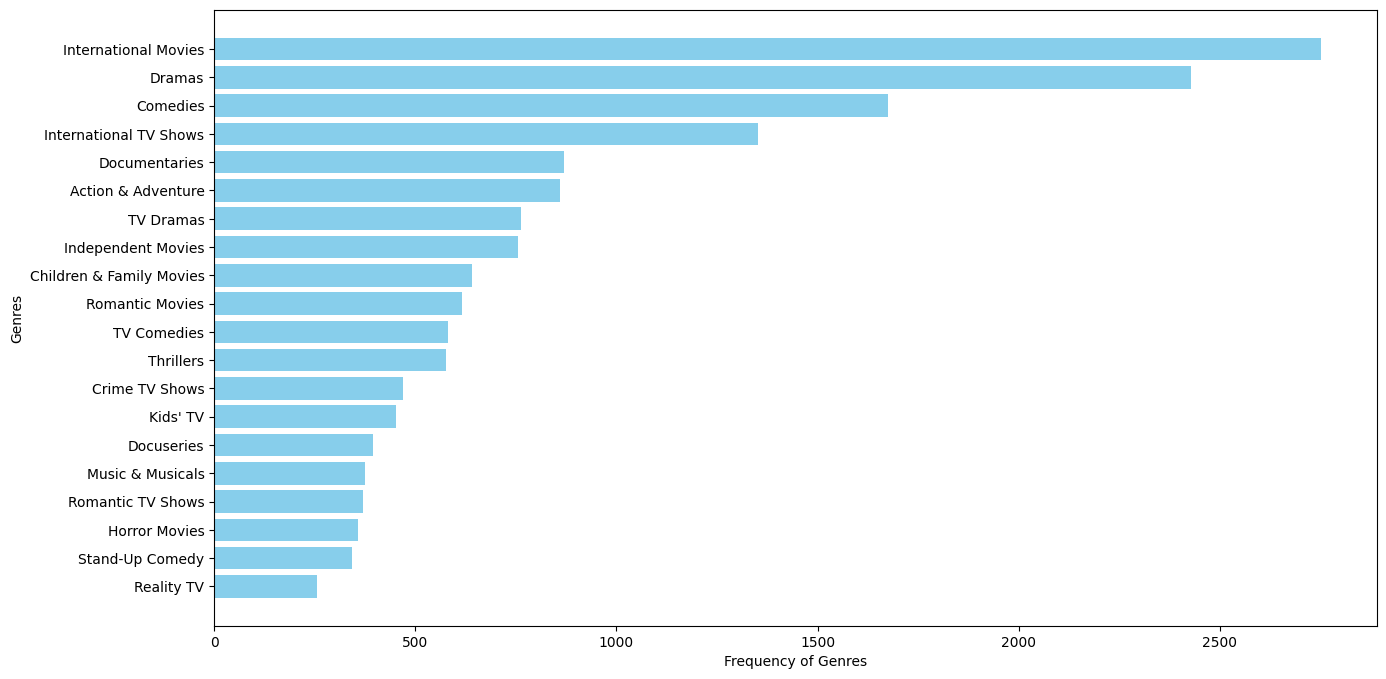

In [ ]:
df_genre=df_final.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['skyblue'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

In [ ]:
#number of distinct titles on the basis of country
df_final.groupby(['Country']).agg({"title":"nunique"}).sort_values(by='title', ascending=False).head(20)

,title
Country,
United States,4249
India,1133
United Kingdom,831
Canada,458
France,406
Japan,337
Spain,237
South Korea,235
Germany,231


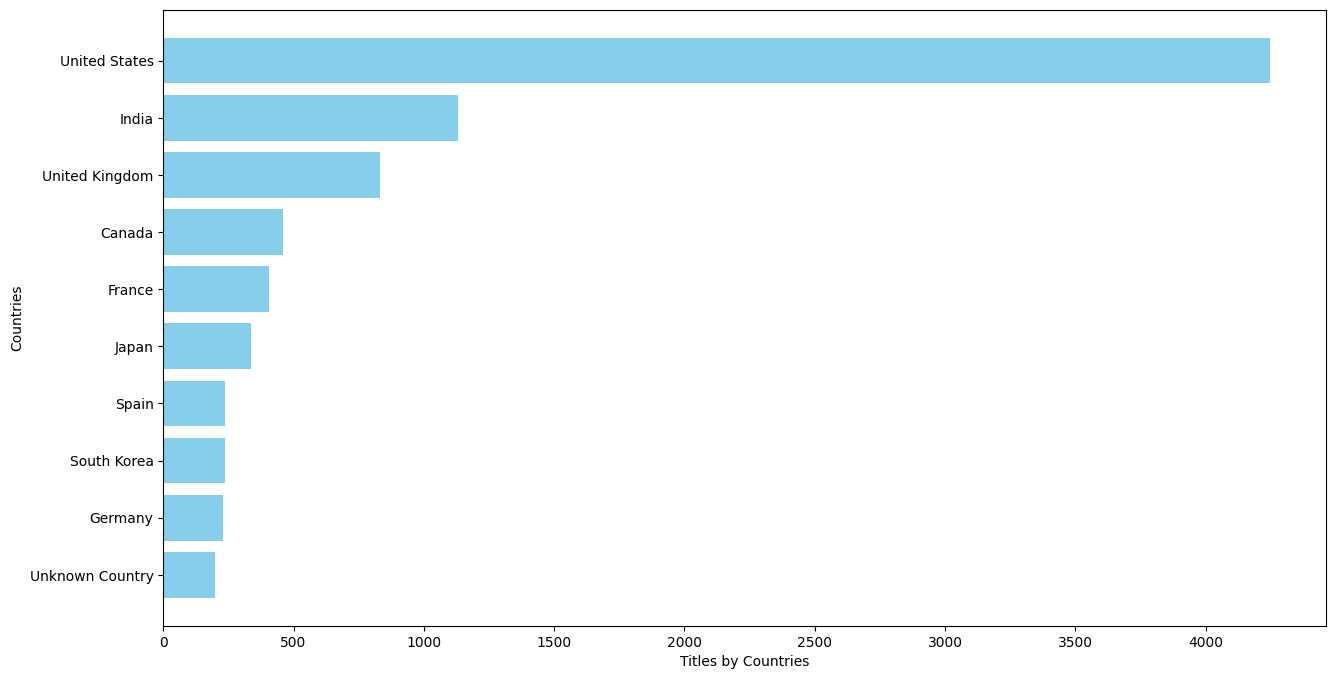

In [ ]:
df_country=df_final.groupby(['Country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['Country'], df_country[::-1]['title'],color=['skyblue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

In [ ]:
#number of distinct titles on the basis of type
title_count_by_type = df_final.groupby(['type']).agg({"title":"nunique"}).sort_values(by="title",ascending=False)

# Calculate the total count of distinct titles
total_title_count = title_count_by_type['title'].sum()

# Calculate the percentage for each type
title_count_by_type['percentage'] = (title_count_by_type['title'] / total_title_count) * 100

# Display the result
print(title_count_by_type)

         title  percentage
type                      
Movie     6131   69.615079
TV Show   2676   30.384921


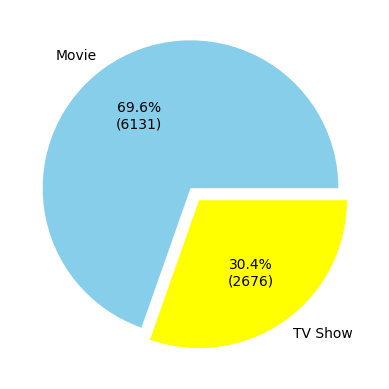

In [ ]:
 df_type=df_final.groupby(['type']).agg({"title":"nunique"}).reset_index()
 plt.pie(df_type['title'],explode=(0.05,0.05), labels=df_type['type'],colors=['skyblue','yellow'],autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(df_type['title']) / 100))
 plt.show()

In [ ]:
#count of distinct titles added per year
df_final.groupby(['year']).agg({"title":"nunique"}).sort_values(by="title",ascending=False)

,title
year,
2019,2018
2020,1879
2018,1650
2021,1501
2017,1189
2016,432
2015,82
2014,24
2011,13


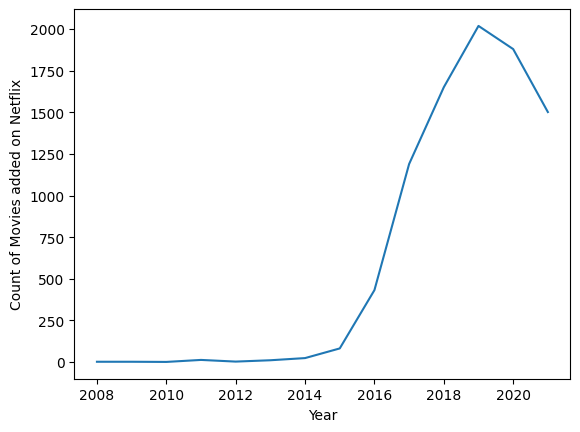

In [ ]:
df_year=df_final.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Count of Movies added on Netflix")
plt.xlabel("Year")
plt.show()

In [ ]:
df_final['release_year'].describe()

count    201991.000000
mean       2013.452891
std           9.003933
min        1925.000000
25%        2012.000000
50%        2016.000000
75%        2019.000000
max        2021.000000
Name: release_year, dtype: float64

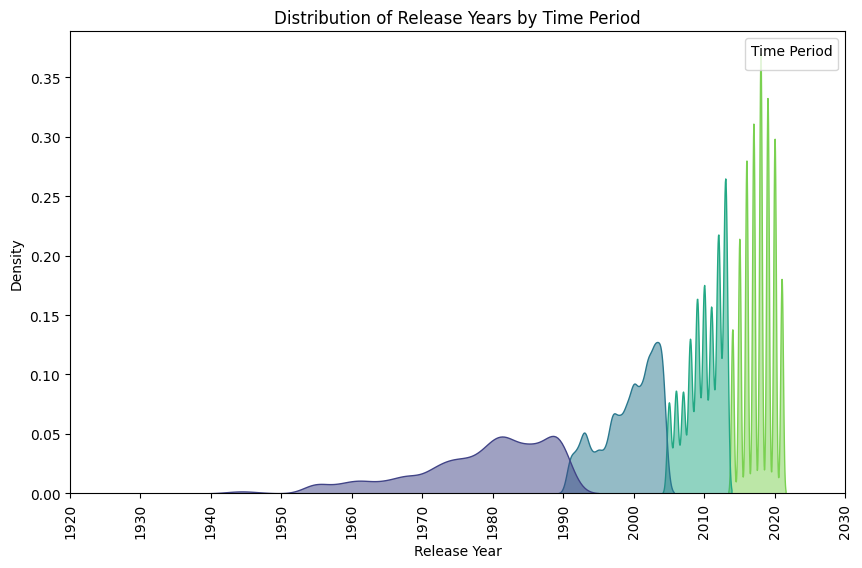

In [ ]:
# Define the bin edges
bin_edges = [1925, 1990, 2004, 2013, 2021]

# Define the labels for the bins
bin_labels = ['1925-1990', '1990-2004', '2004-2013', '2013-2021']

# pd.cut to bin the data and assign labels
df_final['release_year_bins'] = pd.cut(df_final['release_year'], bins=bin_edges, labels=bin_labels)

# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_final, x='release_year', hue='release_year_bins', fill=True, common_norm=False, palette='viridis', alpha=0.5)

# Set ticks on x-axis for every decade
ticks = np.arange(1920, 2040, 10)
plt.xticks(ticks, rotation='vertical')

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.title('Distribution of Release Years by Time Period')
plt.legend(title='Time Period')


# Show the plot
plt.show()

In [ ]:
#number of distinct titles on the basis of rating
df_final.groupby(['rating']).agg({"title":"nunique"}).sort_values(by='title', ascending=False).head(10)

,title
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


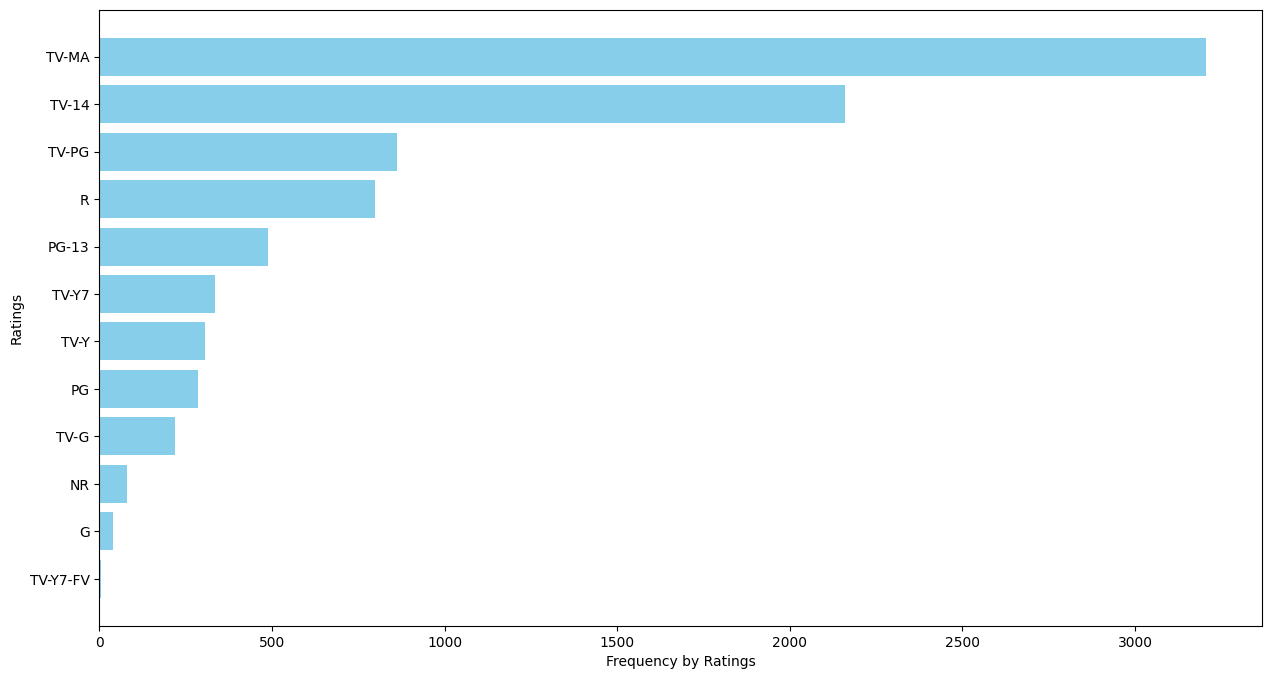

In [ ]:
df_rating=df_final.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:12]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['skyblue'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

In [ ]:
df_final['duration_movies'].describe()

count    201991.000000
mean         77.151680
std          52.269991
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_movies, dtype: float64

<ipython-input-165-6139fbd59b14>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final['duration_movies'], hist=True, kde=False,


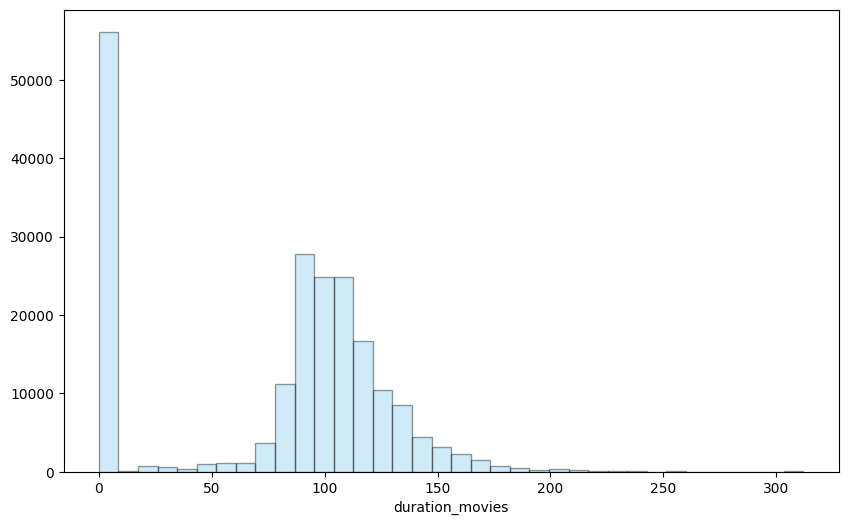

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df_final['duration_movies'], hist=True, kde=False,
             bins=int(36), color='skyblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})
plt.show()

In [ ]:
import re

# Define a function to remove non-numeric characters from a string
def remove_non_numeric(dur):
    return re.sub(r'\D', '', dur)

# Apply the function to the column
df_final['duration_series'] = np.where(df_final['duration'].str.contains('Season'), df_final['duration'], '')
df_final['duration_series'] = df_final['duration_series'].astype(str)
df_final['duration_series'] = df_final['duration_series'].apply(remove_non_numeric)
df_final['duration_series'] = df_final['duration_series'].replace('', np.nan)
df_final['duration_series'] = df_final['duration_series'].fillna(np.nan)
df_final['duration_series']=df_final['duration_series'].astype('Int64')
df_final.head(20)

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,description,duration_movies,month_added,week_Added,year,release_year_bins,duration_series
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown actor,Documentaries,United States,1,Movie,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",90,9,38,2021,2013-2021,<NA>
1,Blood & Water,Unknown director,Ama Qamata,International TV Shows,South Africa,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,38,2021,2013-2021,2
2,Blood & Water,Unknown director,Ama Qamata,TV Dramas,South Africa,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,38,2021,2013-2021,2
3,Blood & Water,Unknown director,Ama Qamata,TV Mysteries,South Africa,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,38,2021,2013-2021,2
4,Blood & Water,Unknown director,Khosi Ngema,International TV Shows,South Africa,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,38,2021,2013-2021,2
5,Blood & Water,Unknown director,Khosi Ngema,TV Dramas,South Africa,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,38,2021,2013-2021,2
6,Blood & Water,Unknown director,Khosi Ngema,TV Mysteries,South Africa,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,38,2021,2013-2021,2
7,Blood & Water,Unknown director,Gail Mabalane,International TV Shows,South Africa,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,38,2021,2013-2021,2
8,Blood & Water,Unknown director,Gail Mabalane,TV Dramas,South Africa,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,38,2021,2013-2021,2
9,Blood & Water,Unknown director,Gail Mabalane,TV Mysteries,South Africa,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,9,38,2021,2013-2021,2


<ipython-input-167-e99ac9adacfe>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final['duration_series'], hist=True, kde=False,


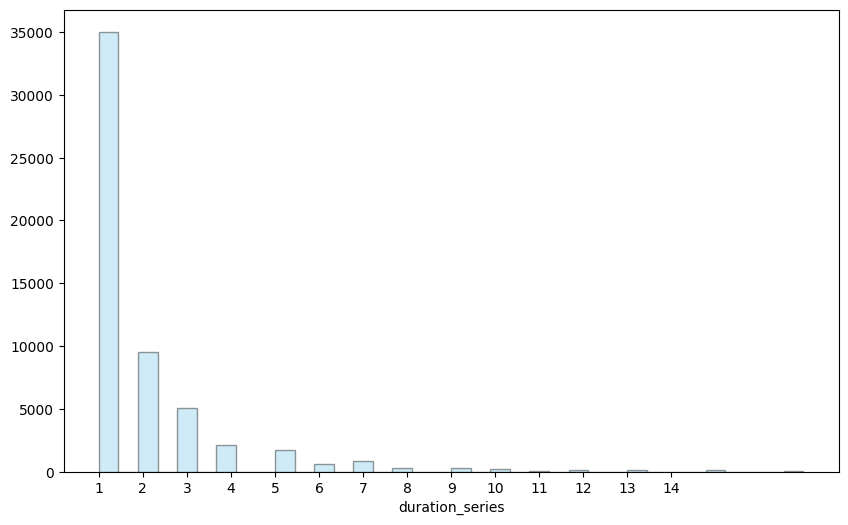

In [ ]:
df_final['duration_series'] = df_final['duration_series'].replace('', np.nan).astype(float)

plt.figure(figsize=(10, 6))
sns.distplot(df_final['duration_series'], hist=True, kde=False,
             bins=int(36), color='skyblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})
plt.xticks(np.arange(1, 15, 1))
plt.show()

**2. Comparison of tv shows vs. movies**

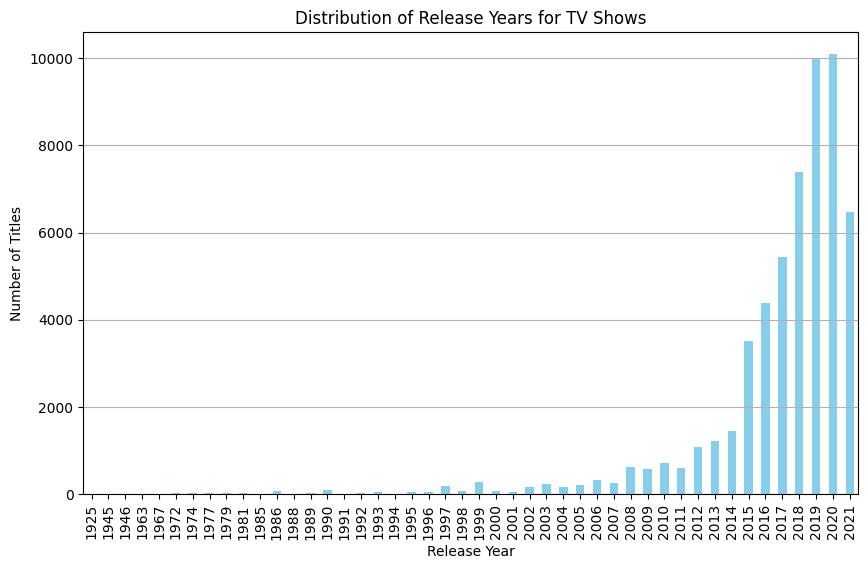

In [ ]:
# Separate the dataset into TV shows and movies
tv_shows = df_final[df_final['type'] == 'TV Show']
movies = df_final[df_final['type'] == 'Movie']

# Group and count the number of titles released in each year for TV shows
tv_shows_by_year = tv_shows.groupby('release_year').size()

# Group and count the number of titles released in each year for movies
movies_by_year = movies.groupby('release_year').size()

# Plot the distribution of release years for TV shows
plt.figure(figsize=(10, 6))
tv_shows_by_year.plot(kind='bar', color='skyblue')
plt.title('Distribution of Release Years for TV Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(axis='y')
plt.show()


*   There appears to be a significant shift in content preference over the years. The low count of TV shows before 2015, preceding the exponential growth in titles, suggests a changed audience preference towards TV shows around that period probably due to technology and high quality content.

*    Netflix may explore acquiring classic TV shows or partnering with content creators to produce nostalgic or cult-favorite series to attract viewers.


*   Given the popularity of TV shows on Netflix, they should continue investing in original content to differentiate themselves from competitors and retain subscribers.





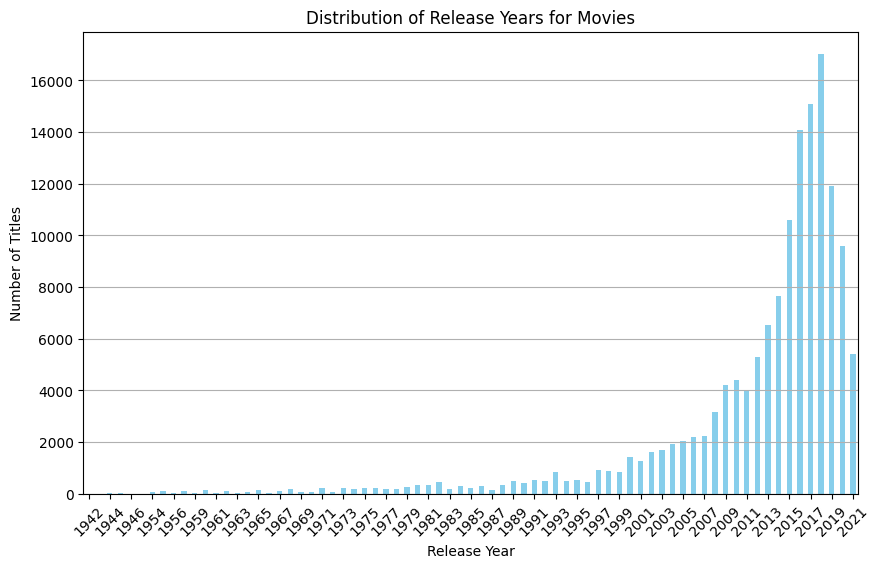

In [ ]:
# Plot the distribution of release years for movies
plt.figure(figsize=(10, 6))
movies_by_year.plot(kind='bar', color='skyblue')
plt.title('Distribution of Release Years for Movies')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(range(0, len(movies_by_year), 2), rotation=45)
plt.grid(axis='y')
plt.show()

There is a significant collection of classics from the 1950-1990's. Overwhelming majority of the movie content is from releases after 2008.

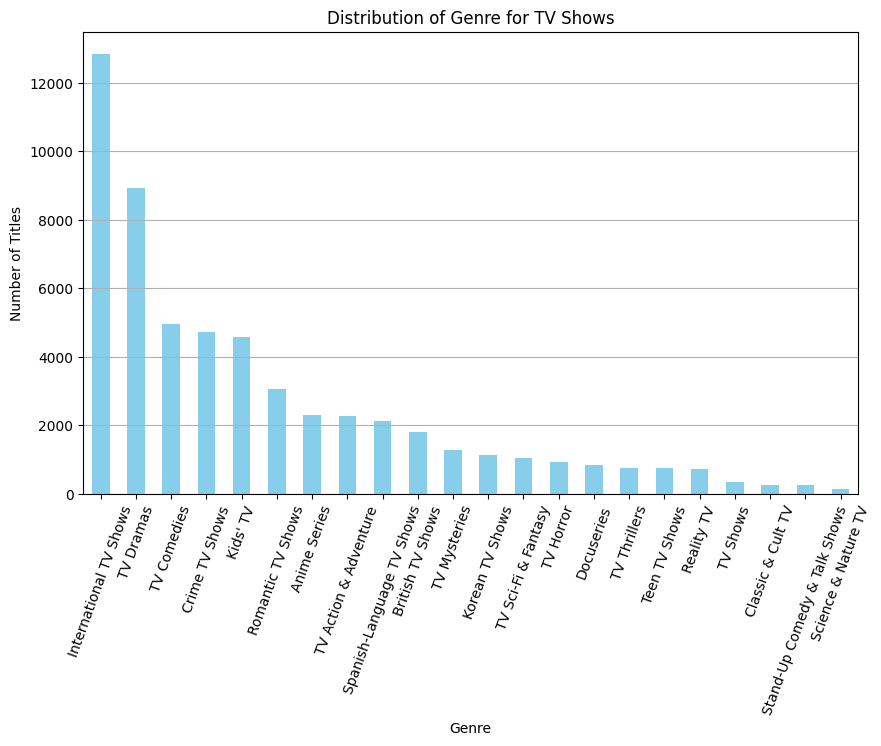

In [ ]:
# Group and count the number of titles in each genre for TV shows
tv_shows_by_year = tv_shows.groupby('Genre').size().sort_values(ascending=False)

# Group and count the number of titles in each genre for movies
movies_by_year = movies.groupby('Genre').size().sort_values(ascending=False)

# Plot the distribution of Genre for TV shows
plt.figure(figsize=(10, 6))
tv_shows_by_year.plot(kind='bar', color='skyblue')
plt.title('Distribution of Genre for TV Shows')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=70)
plt.grid(axis='y')
plt.show()

International TV Shows, TV Dramas and TV Comedies rule the TV Show content space on Netflix. I suspect international tv shows produced mainly from USA would be popular world over.

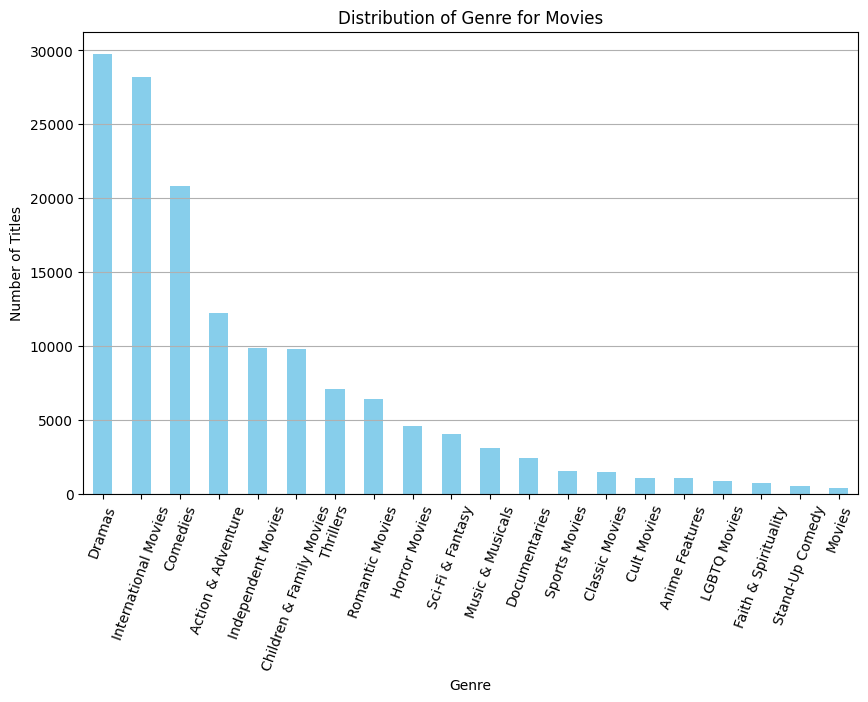

In [ ]:
# Plot the distribution of Genre for Movies
plt.figure(figsize=(10, 6))
movies_by_year.plot(kind='bar', color='skyblue')
plt.title('Distribution of Genre for Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=70)
plt.grid(axis='y')
plt.show()

Similar to TV Shows, in Movies too, Dramas, International Movies and Comedies are the most popular across all regions.

In [ ]:
# Separate the dataset into TV shows and movies
tv_shows = df_final[df_final['type'] == 'TV Show']
movies = df_final[df_final['type'] == 'Movie']

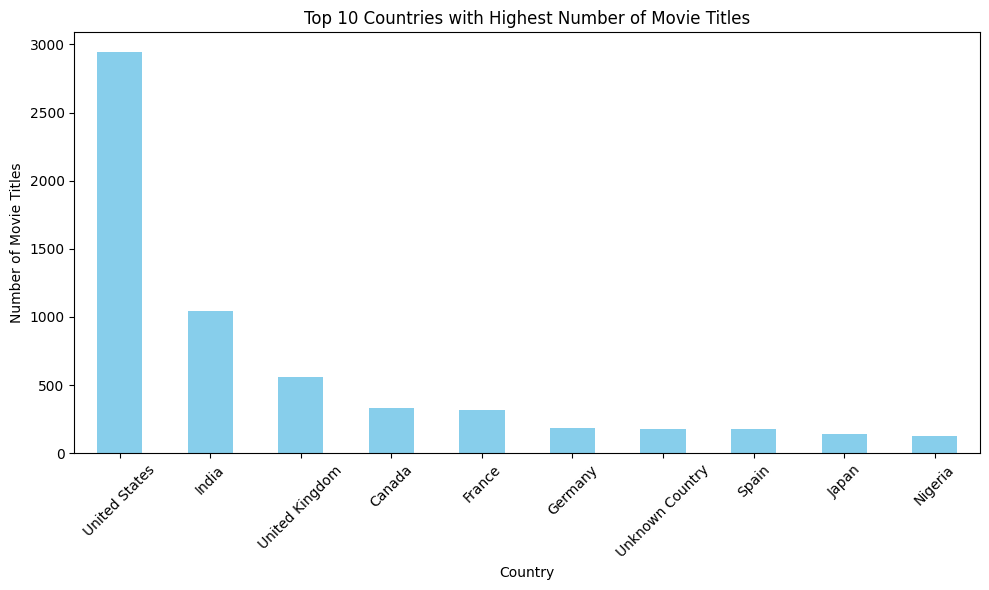

In [ ]:
country_movie_counts = movies.groupby('Country')['title'].nunique()

# Sort the results in descending order and select the top 10 countries
top_10_countries = country_movie_counts.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Highest Number of Movie Titles')
plt.xlabel('Country')
plt.ylabel('Number of Movie Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Netflix is more geared towards movie content from the USA given the popularity of Hollywood across the globe. India also has a significantly high collection on Netflix which can grow in the future.

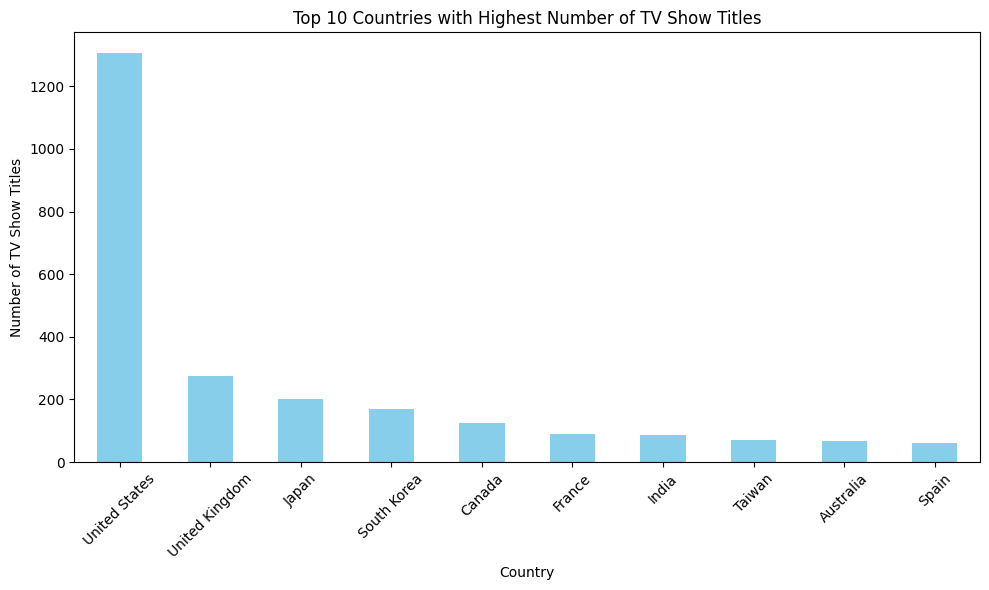

In [ ]:
country_tv_counts = tv_shows.groupby('Country')['title'].nunique()

# Sort the results in descending order and select the top 10 countries
top_10_countries = country_tv_counts.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Highest Number of TV Show Titles')
plt.xlabel('Country')
plt.ylabel('Number of TV Show Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

USA lead the roost for TV Show content on Netflix. UK, like in Movies, and given popularity of English language is high on the list. But surprisingly Japan and South Korea are quite big on TV Shows.

**3. What is the best time to launch a TV show?**

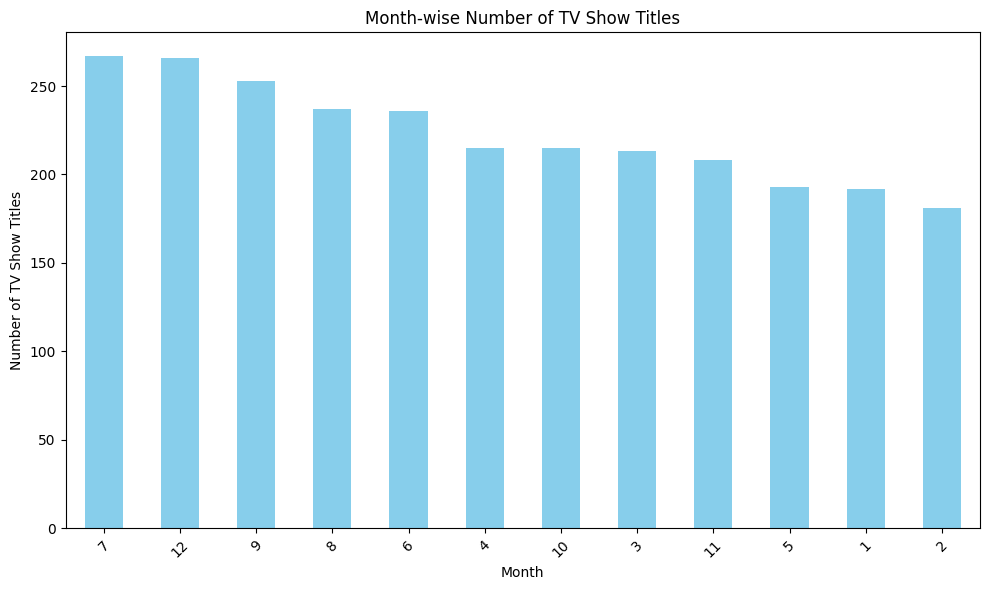

In [ ]:
monthly_tv_counts = tv_shows.groupby('month_added')['title'].nunique()

monthly_tv_counts = monthly_tv_counts.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
monthly_tv_counts.plot(kind='bar', color='skyblue')
plt.title('Month-wise Number of TV Show Titles')
plt.xlabel('Month')
plt.ylabel('Number of TV Show Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Netflix is more likely to add TV Show content in the second half of the year.

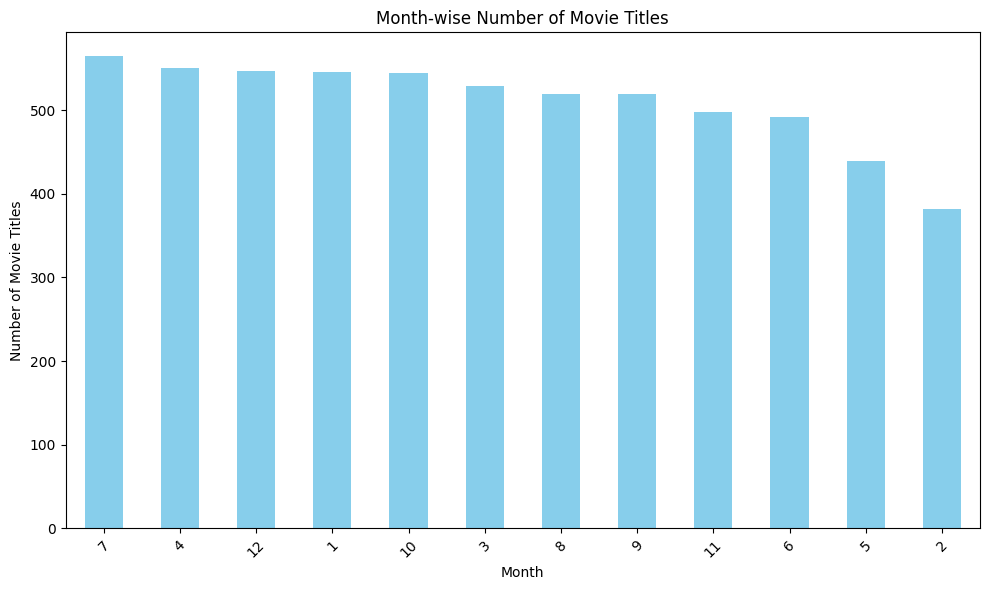

In [ ]:
monthly_movie_counts = movies.groupby('month_added')['title'].nunique()

monthly_movie_counts = monthly_movie_counts.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
monthly_movie_counts.plot(kind='bar', color='skyblue')
plt.title('Month-wise Number of Movie Titles')
plt.xlabel('Month')
plt.ylabel('Number of Movie Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

July and December are months where content for both Movies and TV shows is added the most within a year.

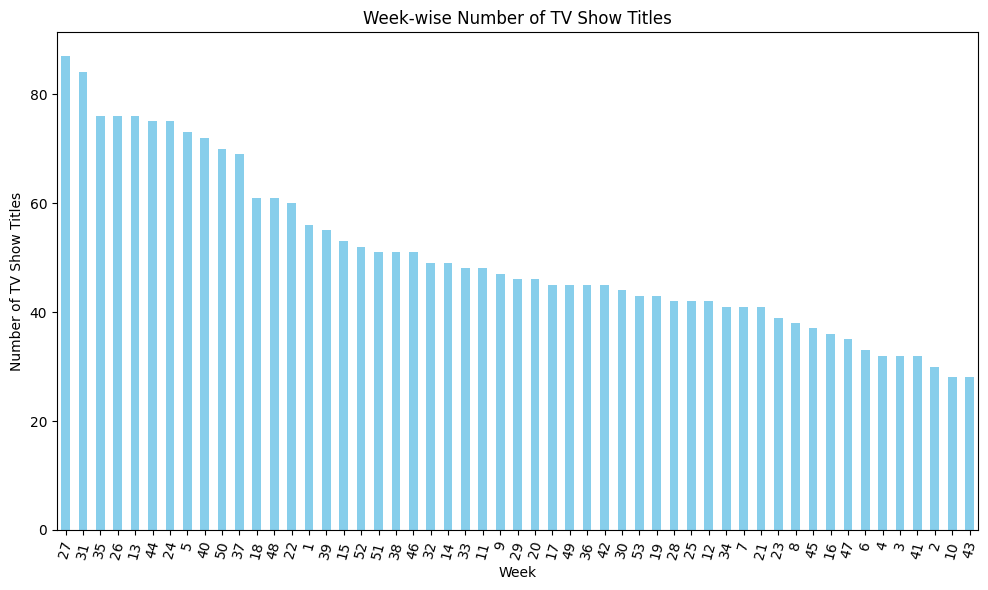

In [ ]:
weekly_tv_counts = tv_shows.groupby('week_Added')['title'].nunique()

weekly_tv_counts = weekly_tv_counts.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
weekly_tv_counts.plot(kind='bar', color='skyblue')
plt.title('Week-wise Number of TV Show Titles')
plt.xlabel('Week')
plt.ylabel('Number of TV Show Titles')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

Most of the content is added around intermittently 20-50 weeks range. Festivities like Christmas, New Year etc calls for last 3 weeks of December being busy for Netlfix.

In [ ]:
weekly_tv_counts.describe()

count    53.000000
mean     50.490566
std      15.309151
min      28.000000
25%      41.000000
50%      46.000000
75%      60.000000
max      87.000000
Name: title, dtype: float64

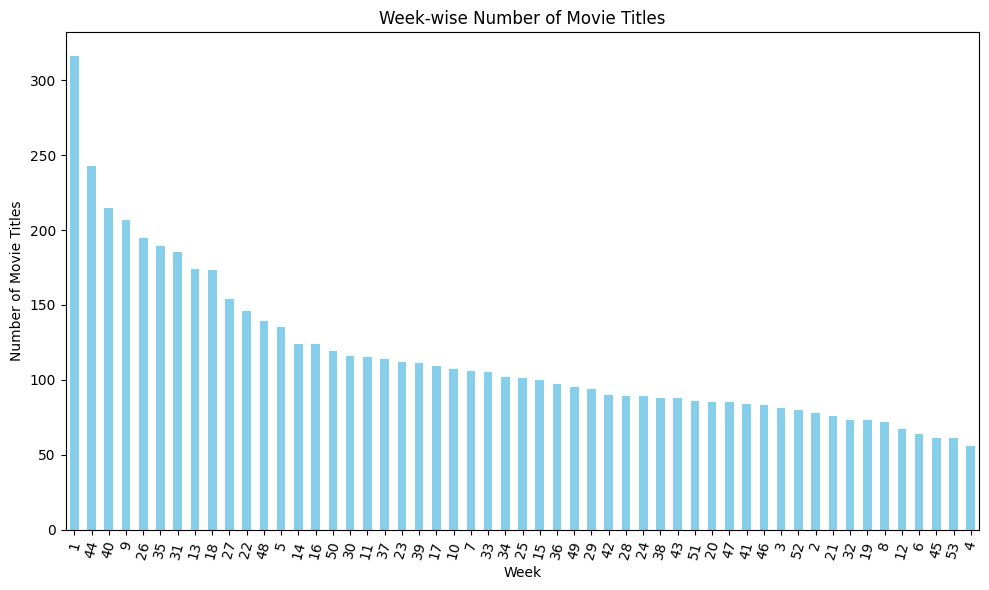

In [ ]:
weekly_movie_counts = movies.groupby('week_Added')['title'].nunique()

weekly_movie_counts = weekly_movie_counts.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
weekly_movie_counts.plot(kind='bar', color='skyblue')
plt.title('Week-wise Number of Movie Titles')
plt.xlabel('Week')
plt.ylabel('Number of Movie Titles')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

Added most movie titles in the first week itself.

In [ ]:
weekly_movie_counts.describe()

count     53.000000
mean     115.679245
std       51.416764
min       56.000000
25%       84.000000
50%      101.000000
75%      124.000000
max      316.000000
Name: title, dtype: float64

**4. Analysis of actors/directors of different types of shows/movies.**

In [ ]:
# Filter out records with 'Unknown Actor'
df_actors = movies[movies['Actors'] != 'Unknown actor']

# Group the DataFrame by title, and count the number of occurrences of each actor in the first four records of each title
actor_frequency = df_actors.groupby('title').apply(lambda x: x.head(4)['Actors'].value_counts()).reset_index(name='frequency')

# Reset the index to bring 'actor' back as a regular column
actor_frequency = actor_frequency.rename(columns={'level_1': 'Actor'})

# Summarize the frequency of each actor across all titles
actor_total_frequency = actor_frequency.groupby('Actor')['frequency'].sum().reset_index()

# Sort the actors by their total frequency in descending order
actor_total_frequency_sorted = actor_total_frequency.sort_values(by='frequency', ascending=False)

# Display the top actors by frequency
print(actor_total_frequency_sorted.head(20))

                 Actor  frequency
7287    Shah Rukh Khan         75
4243      Akshay Kumar         68
4328  Amitabh Bachchan         55
4239        Ajay Devgn         41
4391       Anil Kapoor         39
4147        Aamir Khan         39
7168       Salman Khan         36
5039        Donnie Yen         36
6629  Naseeruddin Shah         34
4177      Adam Sandler         33
6694      Nicolas Cage         33
4226       Ahmed Helmy         33
7208       Sanjay Dutt         33
7289     Shahid Kapoor         32
5532        Jack Black         28
5416     Harrison Ford         28
5881    Junko Takeuchi         27
5792       Johnny Depp         27
3343      Rupa Bhimani         26
6981      Ramsey Nouah         25


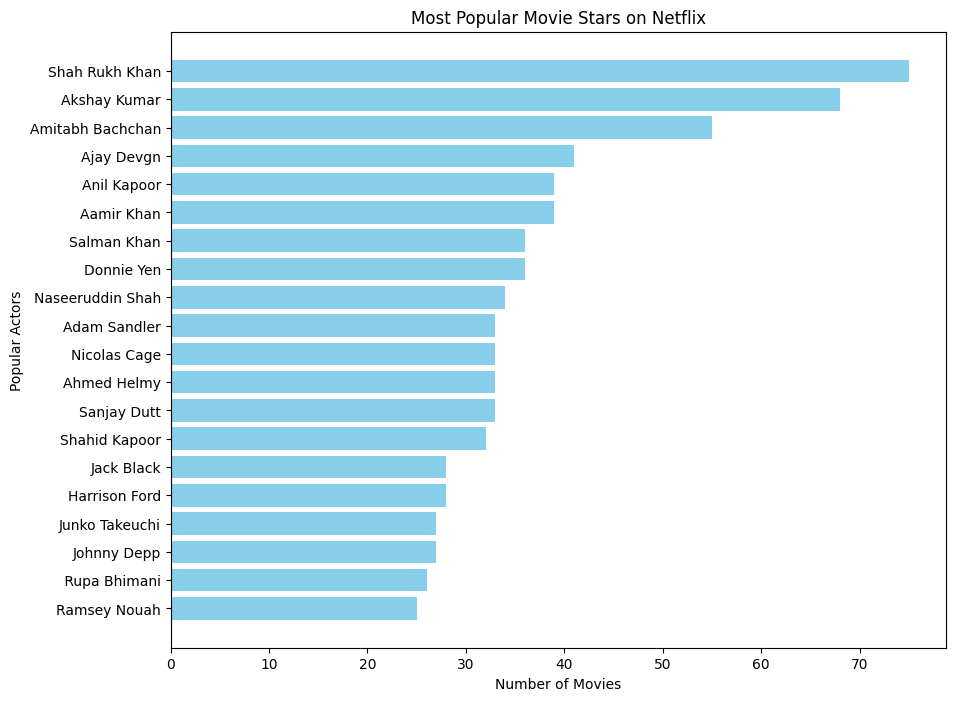

In [ ]:
df_actor=actor_total_frequency_sorted[:20]

# Create the bar plot
plt.figure(figsize=(10, 8))  # Adjust figure size if necessary
plt.barh(df_actor[::-1]['Actor'], df_actor[::-1]['frequency'], color='skyblue')

# Add labels and title
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.title('Most Popular Movie Stars on Netflix')

# Show the plot
plt.show()

SRK, Akshay Kumar and Amitabh are the most popular stars on Netflix. Adam Sandler, Nicolas Cage, Donnie Yen are some others from other film industries.

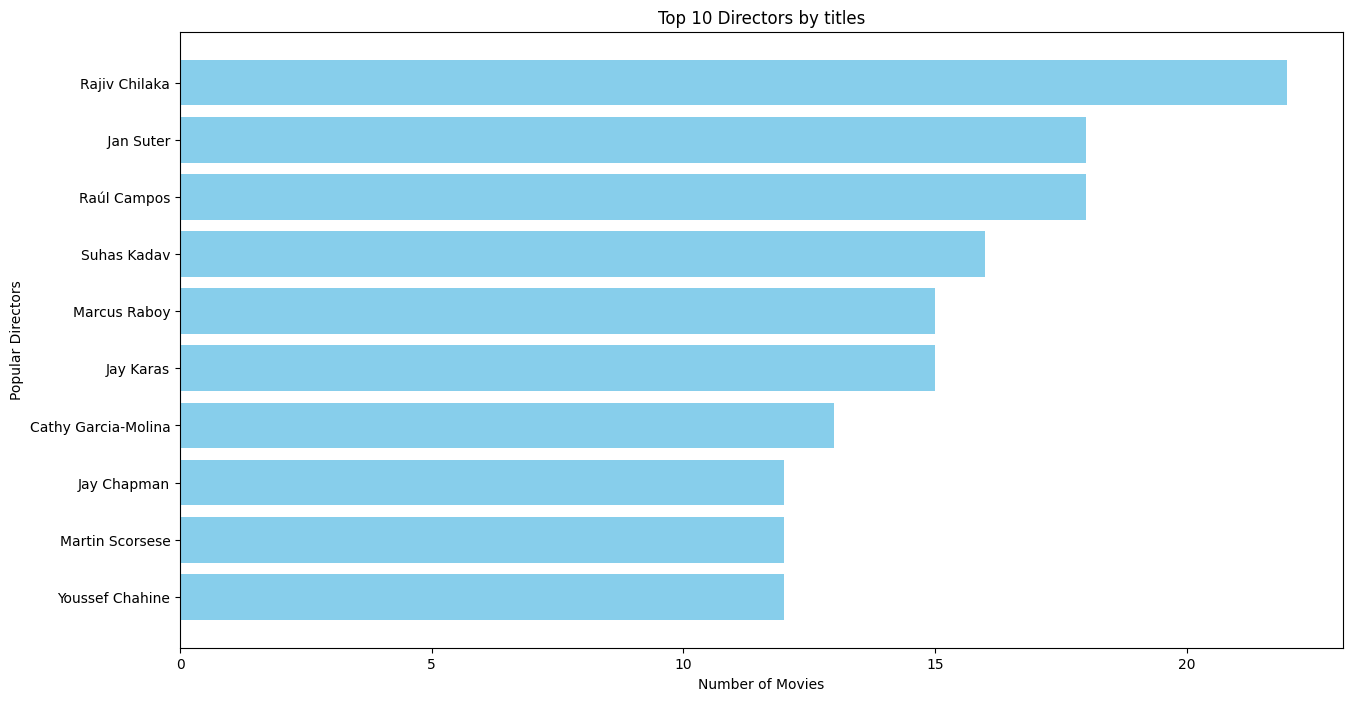

In [ ]:
# Filter out records with 'Unknown Director'
df_directors = movies[movies['Directors'] != 'Unknown director']

# Group the DataFrame by 'Directors' and count the number of unique titles for each director
df_directors = df_directors.groupby('Directors')['title'].nunique().reset_index()

# Sort the DataFrame in descending order based on the title count and exclude 'Unknown Director'
df_directors = df_directors.sort_values(by='title', ascending=False)[:10]

# Plot the horizontal bar chart
plt.figure(figsize=(15,8))
plt.title("Top 10 Directors by titles")
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['skyblue'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Indian Animation Movie directors like Rajiv and Suhas are the only Indian presence here. Popular Netflix collaborators like Suter and Campos are also high not to forget superstar directors like Scorsese.

In [ ]:
df_directors = movies[movies['Directors'] != 'Unknown director']
indian_directors = df_directors[df_directors['Country']=="India"].reset_index()

# Group the DataFrame by 'Directors' and count the number of unique titles for each director
indian_directors = indian_directors.groupby('Directors')['title'].nunique().reset_index()

# Sort the DataFrame in descending order based on the title count
indian_directors = indian_directors.sort_values(by='title', ascending=False)[:10]

print(indian_directors)

              Directors  title
501       Rajiv Chilaka     22
665         Suhas Kadav     16
204        David Dhawan      9
546      S.S. Rajamouli      7
512     Ram Gopal Varma      7
136      Anurag Kashyap      7
463        Priyadarshan      6
122        Anees Bazmee      6
156  Ashutosh Gowariker      6
262          Imtiaz Ali      6


Popular Indian director list makes it seem like Netfix is going for talented directors with a different approach to classic Bollywood.

In [ ]:
# Filter out records with 'Unknown Actor'
df_actors = tv_shows[tv_shows['Actors'] != 'Unknown actor']

# Group the DataFrame by title, and count the number of occurrences of each actor in the first four records of each title
actor_frequency = df_actors.groupby('title').apply(lambda x: x.head(4)['Actors'].value_counts()).reset_index(name='frequency')

# Reset the index to bring 'actor' back as a regular column
actor_frequency = actor_frequency.rename(columns={'level_1': 'Actor'})

# Summarize the frequency of each actor across all titles
actor_total_frequency = actor_frequency.groupby('Actor')['frequency'].sum().reset_index()

# Sort the actors by their total frequency in descending order
actor_total_frequency_sorted = actor_total_frequency.sort_values(by='frequency', ascending=False)

# Display the top actors by frequency
print(actor_total_frequency_sorted.head(10))

                    Actor  frequency
2657   David Attenborough         48
3195    Kate del Castillo         14
4197  Yoshitsugu Matsuoka         13
3610        Natsuki Hanae         12
2204            Aaron Yan         12
3152         Jun Fukuyama         11
3792        Ricky Gervais         10
4200                  You         10
3534         Michela Luci          9
3339         Lee Seung-gi          9


Sir David is high on the list as his documentaries are all there on Netflix content shelves.

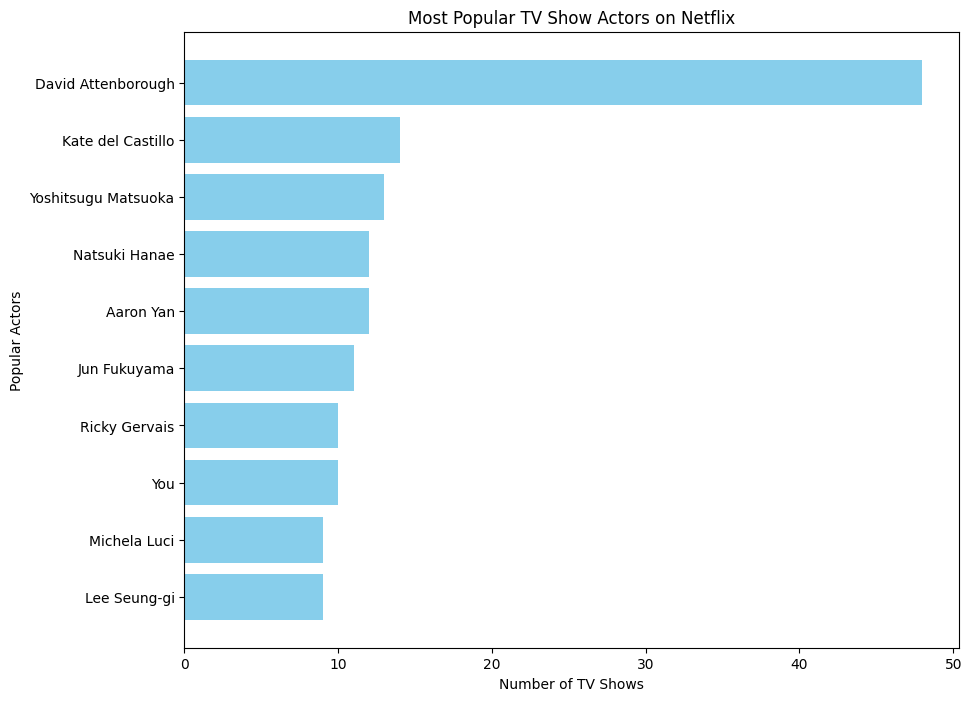

In [ ]:
df_actor=actor_total_frequency_sorted[:10]

# Create the bar plot
plt.figure(figsize=(10, 8))  # Adjust figure size if necessary
plt.barh(df_actor[::-1]['Actor'], df_actor[::-1]['frequency'], color='skyblue')

# Add labels and title
plt.xlabel('Number of TV Shows')
plt.ylabel('Popular Actors')
plt.title('Most Popular TV Show Actors on Netflix')

# Show the plot
plt.show()

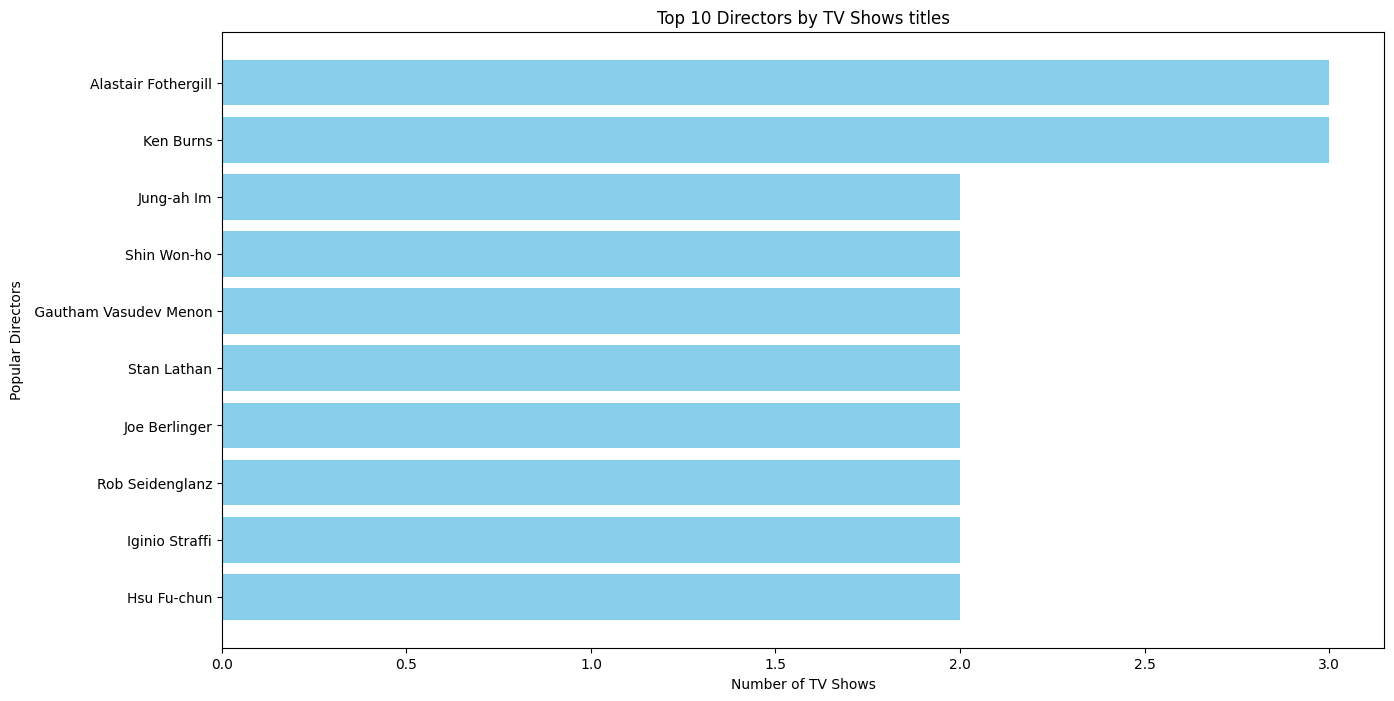

In [ ]:
# Filter out records with 'Unknown Director'
df_directors = tv_shows[tv_shows['Directors'] != 'Unknown director']

# Group the DataFrame by 'Directors' and count the number of unique titles for each director
df_directors = df_directors.groupby('Directors')['title'].nunique().reset_index()

# Sort the DataFrame in descending order based on the title count and exclude 'Unknown Director'
df_directors = df_directors.sort_values(by='title', ascending=False)[:10]

# Plot the horizontal bar chart
plt.figure(figsize=(15,8))
plt.title("Top 10 Directors by TV Shows titles")
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['skyblue'])
plt.xlabel('Number of TV Shows')
plt.ylabel('Popular Directors')
plt.show()

**Which genre movies are more popular or produced more?**

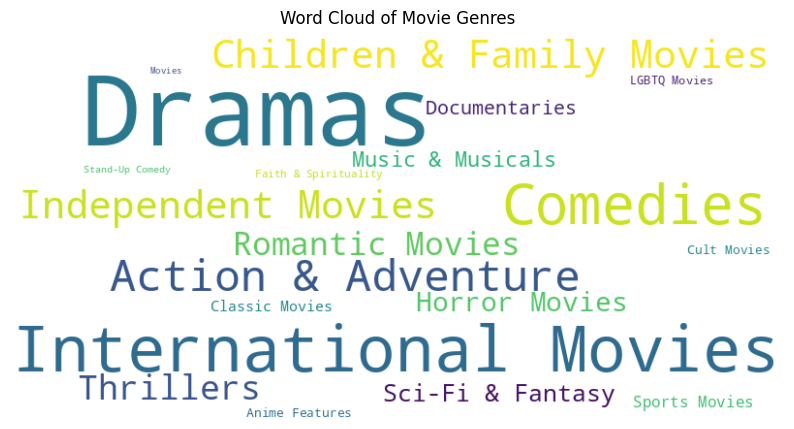

In [ ]:
from wordcloud import WordCloud

# Step 1: Extract genre information
genres = movies['Genre'].dropna().str.split(',').explode().str.strip()

# Step 2: Count the frequency of each genre
genre_counts = genres.value_counts()

# Step 3: Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Genres')
plt.show()


Dramas, International Movies, Comedies, Action & Adventure are few of the most popular.
Faith & Spirituality, Cult and Anime are the least popular albeit with an audience of their own.

In [ ]:
df_final1 = df_final.copy()

# Calculate the difference between date added year and release year
df_final1['years_to_add'] = df_final1['date_added'].dt.year - df_final1['release_year']

# Find the mode of the differences
mode_years_to_add = df_final1['years_to_add'].mode().iloc[0]

print(f"The most common time interval between release and addition to Netflix is approximately {mode_years_to_add} years.")

The most common time interval between release and addition to Netflix is approximately 0 years.


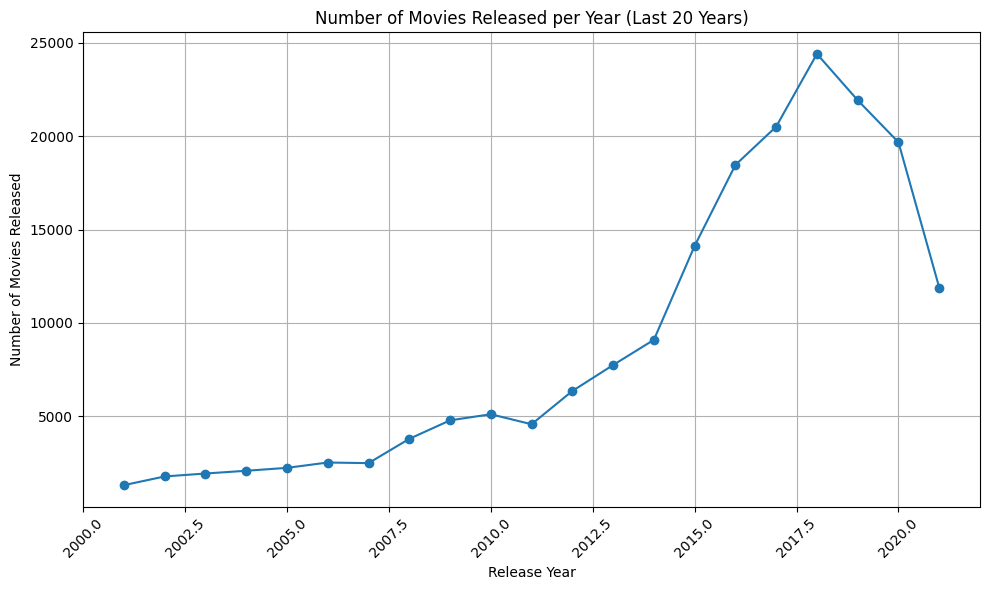

In [ ]:
# 1. Filter Data for the last 20 years
last_20_years_data = df_final[df_final['release_year'] >= df_final['release_year'].max() - 20]


# 2. Group Data by release year and count movies
movies_per_year = last_20_years_data.groupby('release_year').size()

# 3. Plot the data
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linestyle='-')
plt.title('Number of Movies Released per Year (Last 20 Years)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Sharp increase in numbers from around 2015.

<ipython-input-233-23e4f21146e2>:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

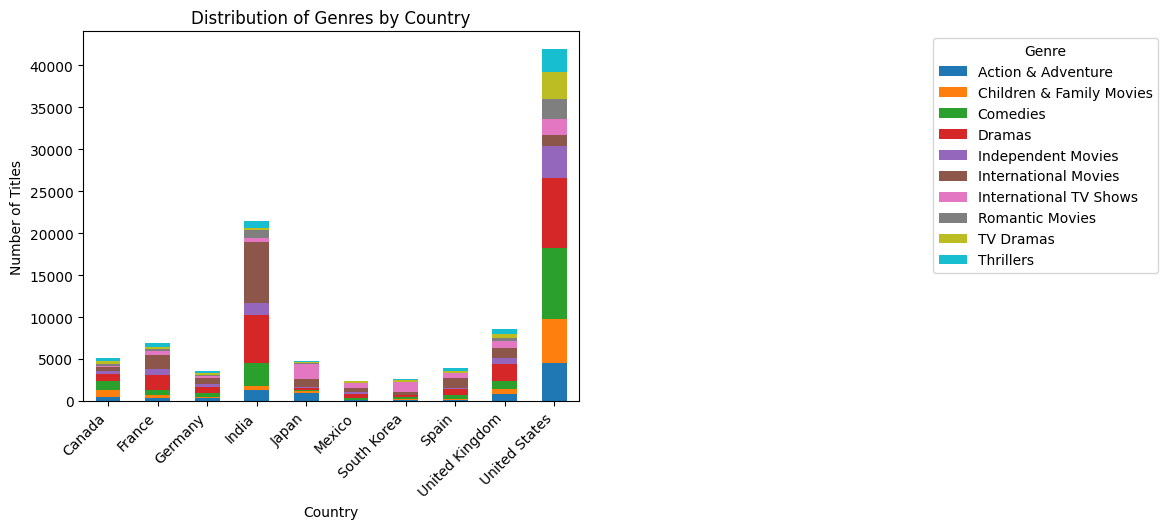

In [ ]:

df_final_copy = df_final.copy()

df_final_copy = df_final_copy[df_final_copy['Country'].isin(df_final_copy['Country'].value_counts().nlargest(10).index)]
df_final_copy = df_final_copy[df_final_copy['Genre'].isin(df_final_copy['Genre'].value_counts().nlargest(10).index)]

# Grouping by country and genre to get counts
genre_by_country = df_final_copy.groupby(['Country', 'Genre']).size().unstack(fill_value=0)

# Plotting stacked bar chart
plt.figure(figsize=(12, 8))
genre_by_country.plot(kind='bar', stacked=True)
plt.title('Distribution of Genres by Country')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.legend(title='Genre', bbox_to_anchor=(1.7, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**RECOMMENDATIONS**





1. Content for Diverse Audience:

Analyze viewership data to identify specific preferences within each country. For example, in India, where movies have been declining since 2018, focus on producing high-quality Indian movies that cater to local tastes and relate to their sensibilities.


2. Partnerships & Collaborations:

Keep investing in self-produced content to differentiate from the competition. Evaluate the success of previous collaborations with creators, to determine the impact of such partnerships on Netflix's content strategy and market reach.


3. Strategic Timing for Content Release:

Data suggests that TV shows perform well when added in the month of July or December, while movies are preferred during the last week of the year or the first month of the next year.


4. Genre Recommendations for Specific Regions:

Dramas, International Movies and Comedies are by far the most popular genres across countries. But there are certain genres that are popular in specific regions like International TV shows are suggested for Japan and South Korean audiences, Indian and USA have huge audience for Romantic movies comparitively speaking.


5. Movie Length across Countries:

Similar to the USA, the UK audience also prefers movies with a duration of 80-120 minutes. Indian market has appetite for slightly longer duration.


6. Star Power:

Markets like India still have star power like yesteryear Hollywood and so SRK, Akshay Kumar, Amitabh Bachchan are most popular. That is not so much the case with markets like UK.


7. Consideration of Director-Actor Combinations:

Netflix should strategically collaborate with renowned actors and directors in each region to create compelling content that resonates with local audiences to drive viewership and brand loyalty.